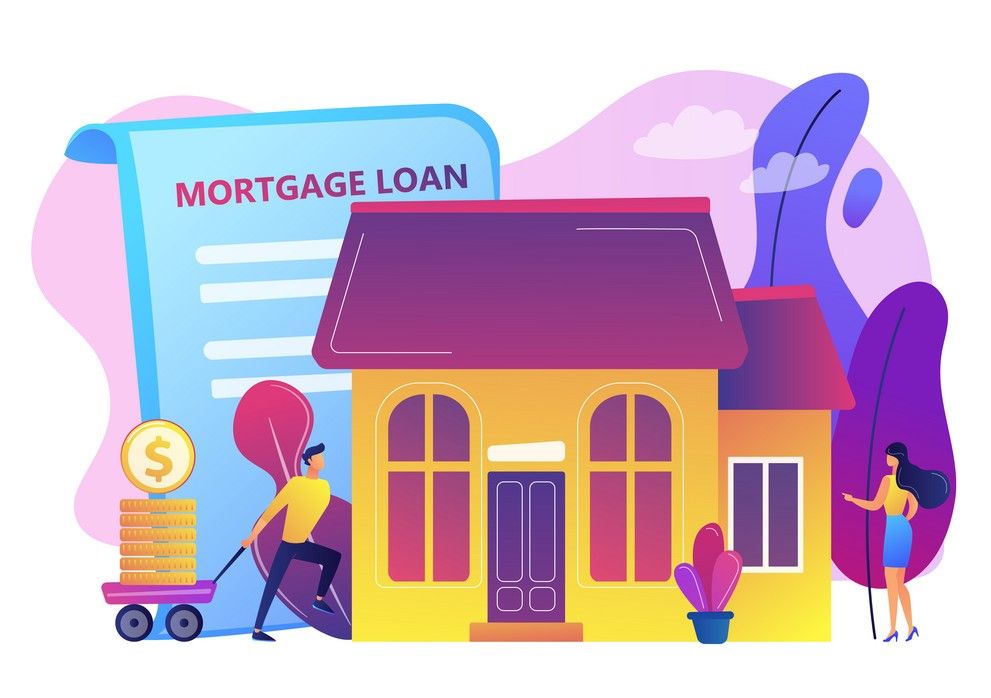

# Mortgage Loan Denial Classification

### Author: Eric Romano

## Overview

The growth of the U.S.’s diverse Hispanic population has caused a demographic shift, diversifying different communities across the nation. Introducing new elements into different markets, specifically the Real Estate industry. The growth of this diverse group has also fueled the increase in Hispanic homeownership and economic data suggest that Hispanic homebuyers will become a large part in the Real Estate market in the coming decades. According to Urban Institute, The Hispanic population will comprise of 56 percent of all new homebuyers by 2030. A fifth of millennial population in the county is Hispanic who are currently at the prime age to buy their first home. 
Before entering this new decade, the housing market was experiencing certain hurdles that are now just inflated even further. Affordability has become an increasing challenge across the nation, causing a nearly historic low homeownership. 



## Business Problem

Due to wealth gap inequality and our current housing market, it is in our best interest to learn what recommendations can provide solutions for these minority groups. To formulate these recommendations, I will create a mortgage application prediction model. From this model, I will present features that have the highest significances in predicting when a mortgage application will be denied. With the fifth of all millennials entering their prime ages to purchase real estate, and of that group another fifth identifies as either Hispanic or Latino this can be seen as a long-term investment that will drive future ROIs. The following are the questions I will answer in this analysis. 
1.	What are the obstacles holding back minority groups, specifically people that identify with the Hispanic/Latinos ethnicity group? 

### Hypothesis

Null Hypothesis (H0): There is no relationship between the H data and Mortgage loan denial predictions
    
Alternative Hypothesis (Ha): There is a relationship between the H data and Mortgage loan denial predications

## Data Understanding

Each year thousands of Financial institutions provide data about mortgages to the public, under the Home Mortgage Disclosure Act (HMDA). From this you can analysis mortgage trends and learn important insights into why loans get denied. The HMDA data are the most comprehensive publicly available information on mortgage market activity which is used by industry, consumer groups, regulators, and others to assess potential fair lending risks and for other purposes. However, the HMDA data alone cannot be used to determine if lenders are complying with fair lending practices. The data does not include legitimate credit risk considerations for loan approvals and loan pricing decisions. Thus, not having all the necessary information to evaluate if an institution’s compliance with fair lending laws. The data helps the public to assess how financial institutions are serving the housing needs of their local communities.

The dataset used for this project can be found at https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=nj&records=all-records&field_descriptions=labels 

This dataset contains 349,563 rows and 78 columns.

In [87]:
## Adding liberies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#
import seaborn as sns
sns.set_style('whitegrid')

# sklearn 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

from sklearn import tree

# avoid warning signs
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_mortgage_2017 = pd.read_csv('hmda_2017_nj_all-records_labels.csv')

In [4]:
df_mortgage_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349563 entries, 0 to 349562
Data columns (total 78 columns):
as_of_year                        349563 non-null int64
respondent_id                     349563 non-null object
agency_name                       349563 non-null object
agency_abbr                       349563 non-null object
agency_code                       349563 non-null int64
loan_type_name                    349563 non-null object
loan_type                         349563 non-null int64
property_type_name                349563 non-null object
property_type                     349563 non-null int64
loan_purpose_name                 349563 non-null object
loan_purpose                      349563 non-null int64
owner_occupancy_name              349563 non-null object
owner_occupancy                   349563 non-null int64
loan_amount_000s                  349409 non-null float64
preapproval_name                  349563 non-null object
preapproval                       34956

In [5]:
# Drop the columns that are represented twice 
df= df_mortgage_2017.drop(['loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval',
                           'action_taken', 'state_name', 'state_abbr', 'state_code', 'applicant_ethnicity',
                           'co_applicant_ethnicity', 'applicant_race_1', 'applicant_race_2', 'applicant_race_3',
                           'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
                           'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 'applicant_sex',
                           'co_applicant_sex', 'purchaser_type', 'hoepa_status', 'lien_status', 'edit_status',
                           'edit_status_name', 'sequence_number', 'application_date_indicator',
                           'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'as_of_year', 
                           'respondent_id', 'agency_abbr', 'agency_code','county_code', 'msamd', 
                           'census_tract_number','action_taken_name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349563 entries, 0 to 349562
Data columns (total 37 columns):
agency_name                       349563 non-null object
loan_type_name                    349563 non-null object
property_type_name                349563 non-null object
loan_purpose_name                 349563 non-null object
owner_occupancy_name              349563 non-null object
loan_amount_000s                  349409 non-null float64
preapproval_name                  349563 non-null object
msamd_name                        348723 non-null object
county_name                       348887 non-null object
applicant_ethnicity_name          349563 non-null object
co_applicant_ethnicity_name       349563 non-null object
applicant_race_name_1             349563 non-null object
applicant_race_name_2             1756 non-null object
applicant_race_name_3             143 non-null object
applicant_race_name_4             30 non-null object
applicant_race_name_5             18 non-n

For this analysis, I will focus on solely loan purposes that are for home purchase. 

In [9]:
# Find loan_purpose_name that is Home purchase
df_hp = df.loc[df.loan_purpose_name == 'Home purchase']
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184956 entries, 0 to 349562
Data columns (total 37 columns):
agency_name                       184956 non-null object
loan_type_name                    184956 non-null object
property_type_name                184956 non-null object
loan_purpose_name                 184956 non-null object
owner_occupancy_name              184956 non-null object
loan_amount_000s                  184928 non-null float64
preapproval_name                  184956 non-null object
msamd_name                        184332 non-null object
county_name                       184373 non-null object
applicant_ethnicity_name          184956 non-null object
co_applicant_ethnicity_name       184956 non-null object
applicant_race_name_1             184956 non-null object
applicant_race_name_2             776 non-null object
applicant_race_name_3             50 non-null object
applicant_race_name_4             5 non-null object
applicant_race_name_5             3 non-null 

#### Description of numerical features

- loan_amount_000s : Loan amount in the thousands
- rate_spread : Interest rate obtained after the loan was generated 
- hud_median_family_income : A statistic number that shows the median family income provided by the HUD
- tract_to_msamd_income : The avg income between msamd's
- population : Number of people in the area
- minority_population : Number of minorityies in said area

In [10]:
df_hp.describe()

,loan_amount_000s,applicant_income_000s,rate_spread,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
count,184928.000000,158650.000000,6992.000000,184365.000000,184365.000000,184365.000000,184365.000000,184365.000000,184365.000000
mean,324.523647,143.873974,2.000852,5165.862496,34.966070,83801.391804,124.304496,1354.467833,1778.851550
std,1020.147273,266.556635,0.701360,2042.252291,26.168534,12271.342184,48.582313,687.653006,850.189064
min,1.000000,1.000000,1.500000,0.000000,0.000000,54200.000000,0.000000,0.000000,0.000000
25%,176.000000,69.000000,1.620000,3725.000000,14.390000,73700.000000,92.870003,849.000000,1232.000000
50%,261.000000,103.000000,1.780000,4944.000000,26.559999,73700.000000,118.139999,1283.000000,1670.000000
75%,377.000000,161.000000,2.070000,6343.000000,50.470001,99800.000000,151.070007,1783.000000,2185.000000
max,260000.000000,54874.000000,10.430000,16295.000000,100.000000,99800.000000,346.989990,4968.000000,6522.000000


### Description of categorical features 

- applicant_sex : Male or Female
- loan_type_name : Conventinal, FHA, and VA loans
- owner_occupancy_name : Owner occupied or not
- preapproval_name : Preapproval status
- agency_name : Goverment enties that play a role in the mortgage loan process
- action_taken_name: This is the action taken after the loan was generated 
- denial_reason_name_1 : Shows why a loan was denied

# Feature Engineering Creating Denial Class

In [11]:
# Create the feature binomial class

# Replace all the nan in denial_reason_name_1 & 2 & 3 to None
df_hp.denial_reason_name_1.replace(np.nan, 'None',inplace=True)
df_hp.denial_reason_name_2.replace(np.nan, 'None',inplace=True)
df_hp.denial_reason_name_3.replace(np.nan, 'None',inplace=True)

# Create the binomial class to predict denials by creating a column for the applicants that got denied
df_hp['denial'] = [1 if denial_reason != 'None' else 0 for denial_reason in df_hp['denial_reason_name_1']]

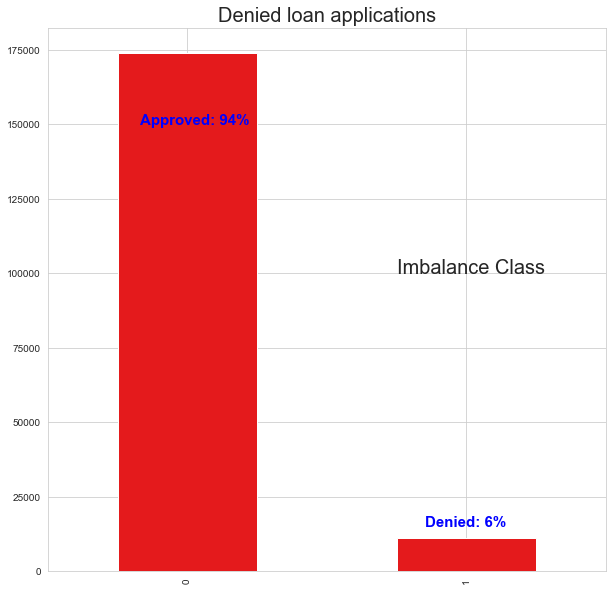

0    0.939153
1    0.060847
Name: denial, dtype: float64

In [21]:
df_hp["denial"].value_counts().plot(kind='bar',cmap='Set1', figsize=(10,10))
plt.title('Denied loan applications', fontsize=20)
plt.text(.75,100000, 'Imbalance Class', fontsize=20)
plt.text(-0.17,150000, 'Approved: 94%', fontsize=15, weight='bold', color= 'b')
plt.text(0.85,15000, 'Denied: 6%', fontsize=15, weight='bold', color= 'b')
plt.savefig('Denied_loan_application.png', dpi=100, bbox_inches='tight')
plt.show()
df_hp["denial"].value_counts(normalize = 'index')

In [22]:
# Create a feature for applicants that have a co_applicant
df_hp['co_applicant'] = [0 if co_applicant == 'No co-applicant' else 1 for co_applicant in df_hp['co_applicant_sex_name']]

# Cleaning data

In [23]:
df_hp.isna().sum()

agency_name                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
owner_occupancy_name                   0
loan_amount_000s                      28
preapproval_name                       0
msamd_name                           624
county_name                          583
applicant_ethnicity_name               0
co_applicant_ethnicity_name            0
applicant_race_name_1                  0
applicant_race_name_2             184180
applicant_race_name_3             184906
applicant_race_name_4             184951
applicant_race_name_5             184953
co_applicant_race_name_1               0
co_applicant_race_name_2          184665
co_applicant_race_name_3          184946
co_applicant_race_name_4          184955
co_applicant_race_name_5          184955
applicant_sex_name                     0
co_applicant_sex_name                  0
applicant_income_000s              26306
purchaser_type_n

As discussed above, there are values within the columns that need to be changed to NaN. This will increase the number of missing values.

In [24]:
# Replace
replace_dict = {
    'owner_occupancy_name': ['Not applicable'],
    'applicant_ethnicity_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'co_applicant_ethnicity_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'applicant_race_name_1':['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'co_applicant_race_name_1':['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'lien_status_name': ['Not applicable'],
    'applicant_sex_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'co_applicant_sex_name': ['Not applicable', 'Information not provided by applicant in mail, Internet, or telephone application'],
    'preapproval_name': ['Not applicable'],
    
}

df_hp.replace(replace_dict, np.nan, inplace=True)
df_hp.isna().sum()

agency_name                            0
loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
owner_occupancy_name                 686
loan_amount_000s                      28
preapproval_name                  124410
msamd_name                           624
county_name                          583
applicant_ethnicity_name           45251
co_applicant_ethnicity_name        32637
applicant_race_name_1              47603
applicant_race_name_2             184180
applicant_race_name_3             184906
applicant_race_name_4             184951
applicant_race_name_5             184953
co_applicant_race_name_1           33519
co_applicant_race_name_2          184665
co_applicant_race_name_3          184946
co_applicant_race_name_4          184955
co_applicant_race_name_5          184955
applicant_sex_name                 38406
co_applicant_sex_name              29406
applicant_income_000s              26306
purchaser_type_n

In [25]:
df_hp.reset_index(drop=True, inplace=True)

# Exploratory Data Analysis

### Does applicants gross income affect an applicants ability in being approved for a loan

In [26]:
# The column denial was featured engineered and can the code be found on the feature engineering section
# approval and denial: mean & median
approval_mean=df_hp.loc[df_hp['denial'] == 0].applicant_income_000s.mean()
approval_median=df_hp.loc[df_hp['denial'] == 0].applicant_income_000s.median()

denial_mean=df_hp.loc[df_hp['denial'] == 1].applicant_income_000s.mean()
denial_median=df_hp.loc[df_hp['denial'] == 1].applicant_income_000s.median()

# print results
print('Approved overall applicants gross income mean {} and median {}'.format(approval_mean, approval_median))
print('Denied overall applicants gross income mean {} and median {}'.format(denial_mean, denial_median))

Approved overall applicants gross income mean 144.7191150394564 and median 104.0
Denied overall applicants gross income mean 132.40901579140655 and median 88.0


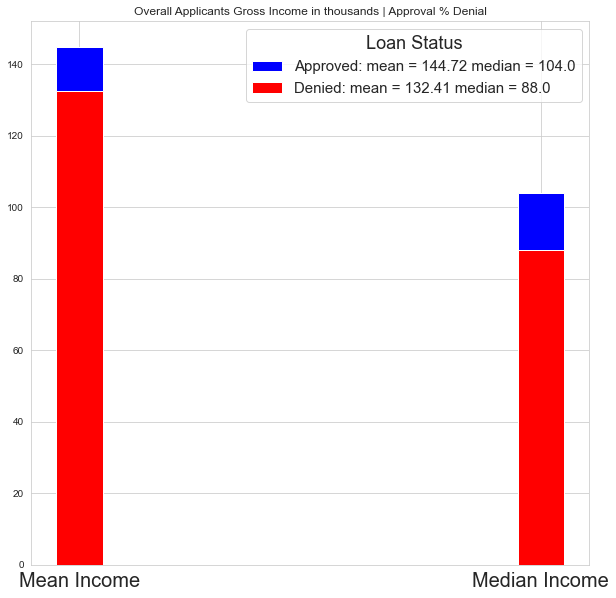

In [27]:
fig, ax = plt.subplots(sharey=True,figsize=(10,10))
ax.bar(x=['Mean Income', 'Median Income'], height=(approval_mean, approval_median), color='b', alpha=1, width=0.1)
ax.bar(x=['Mean Income', 'Median Income'], height=(denial_mean, denial_median), color='r', width=0.1)

plt.legend(['Approved: mean = {} median = {}'.format(np.round(approval_mean, 2),approval_median),
            'Denied: mean = {} median = {}'.format(np.round(denial_mean, 2),denial_median)],
            fontsize=15, title='Loan Status', title_fontsize=18)
ax.tick_params(axis='x', labelsize=20)
plt.title('Overall Applicants Gross Income in thousands | Approval % Denial')
plt.savefig('Gross_income.png', dpi=100, bbox_inches='tight')

From this graph you can tell that the distribution of gross income in NJ is skewwed. In 2019, the average and median house hold income were 114,691 and 82,545 respectively. In order to increase your odds in securing a loan you must increase your gross income or consider applying with a co-applicant. If both applicants are making over 50,000 in gross income you will be considered a less risker investment by your lender. NJ has one of the highest property taxes in the nation and it highly relys on thier residents income taxes. This will keep house prices up as long as thier high earning residents remain in NJ. 

1. Increase your salary to be about 100k a year if possible. 
2. Apply for the loan with more than one applicant on the loan. This will allow you to combine your income.
3. If you still don't reach that gross income threshold consider adding one more person on the loan. 

### What county is has the highest approval rate 

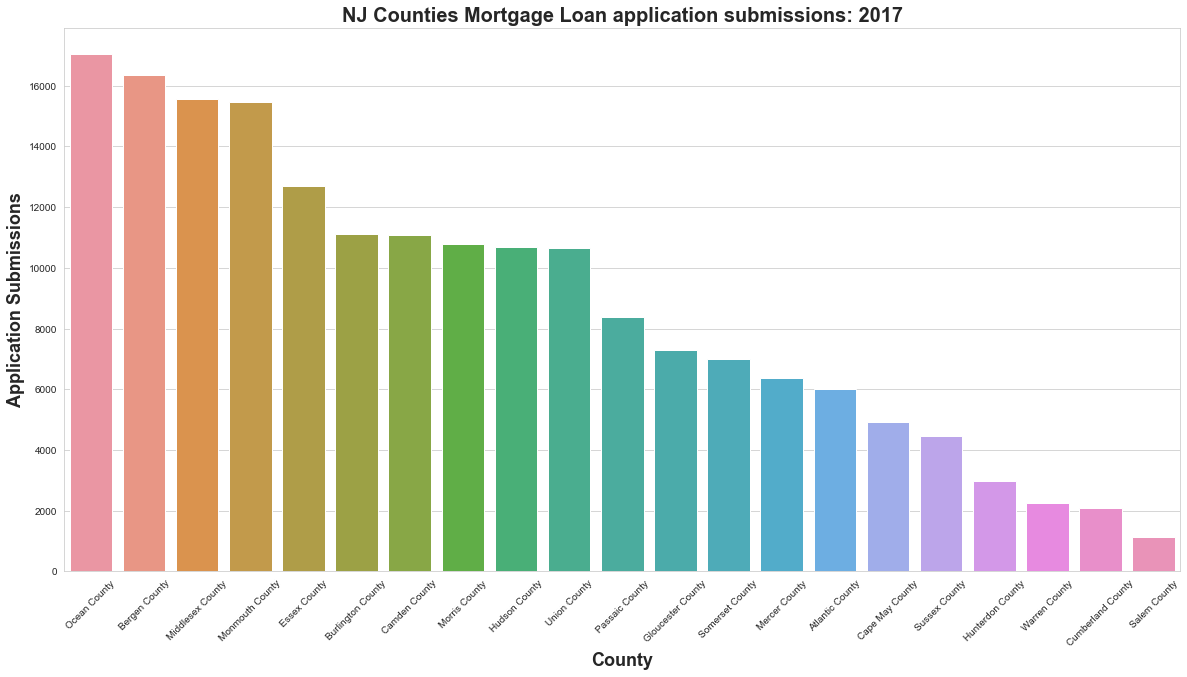

In [31]:
# Highest number of Loan Applicants: Top 10
fig, ax0 = plt.subplots(figsize = (20,10))
ax0 = sns.barplot(x=df_hp.county_name.value_counts().index,
                 y=df_hp.county_name.value_counts())
ax0.set_ylabel('Application Submissions', fontsize=18, weight='semibold')
ax0.set_xlabel('County', fontsize=18, weight='semibold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
ax0.set_title('NJ Counties Mortgage Loan application submissions: 2017', fontsize=20, weight='bold')
plt.savefig('County_Count.png', dpi=100, bbox_inches='tight')

From looking at this graph you can see that there is a higher demand for homes that are in suburban locations. Most of the areas that are high in demand are either near the ocean or NYC. Will this change due to the pandemic that would be an interesting question to look into.

In [28]:
# Create df for the loans aprroved for county_name
df_county_name = pd.crosstab(df_hp['county_name'], df_hp['denial'], normalize='index')

In [35]:
##### Used this code to streamline the analysis of Loan approval rates based on the feature input
def rate_barplot(column_name,label1=None,title=None,x_label=None,y_label=None, ylim=None, width=None, png=None):
    """This return a barplot with a well labelled axis"""
    # Create df for the loans aprroved for column_name
    df = pd.crosstab(column_name, df_hp['denial'], normalize='index')

    #getting the x values from the length of the dataframe
    x = np.arange(df.shape[0])
    
    #index of the df as a label
    labels = list(df.index)
    fig  = plt.figure(figsize=(15,12))
    ax = fig.add_axes([0,0,1,1])

    width = width

    ret1 = ax.bar(x+ width/100,df[1],width=width,label=label1)

    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_ylim([0,ylim])
    ax.set_title(title,fontsize=30,fontweight='bold')
    ax.set_ylabel(y_label,fontsize=20, fontstyle='italic')
    ax.set_xlabel(x_label,fontsize=20, fontstyle='italic')

    ax.grid(True,which='minor',axis='y')

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}%'.format(np.round(height*100,2)),
                        xy=(rect.get_x() + rect.get_width() / 2, 1.05*height),
                        xytext=(0, 6),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=15)

    autolabel(ret1)
    plt.setp(ax.get_xticklabels(),rotation=45,ha='right');
    plt.savefig(png, dpi=100, bbox_inches='tight')
    plt.show()


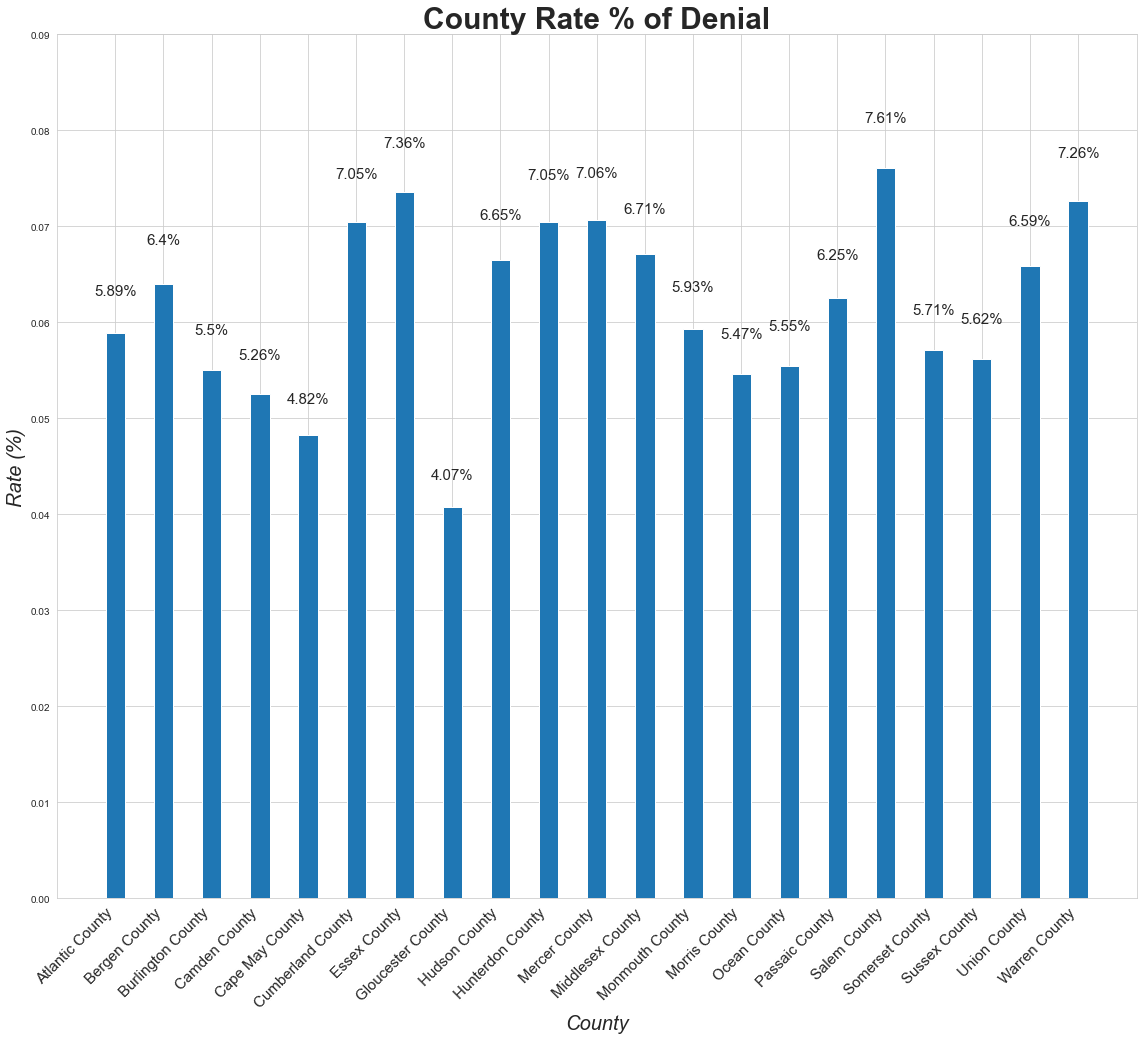

In [41]:
rate_barplot(df_hp['county_name'], 'Denial', 'County Rate % of Denial', 'County', 'Rate (%)', 0.09, 0.40, 'County_denial.png')

This graph allows you to see the County rate of denial. There might be a small correlation to the number of applicants applying and the denial rate but not much. 

### Does it matter what agency you choose to apply for a loan.

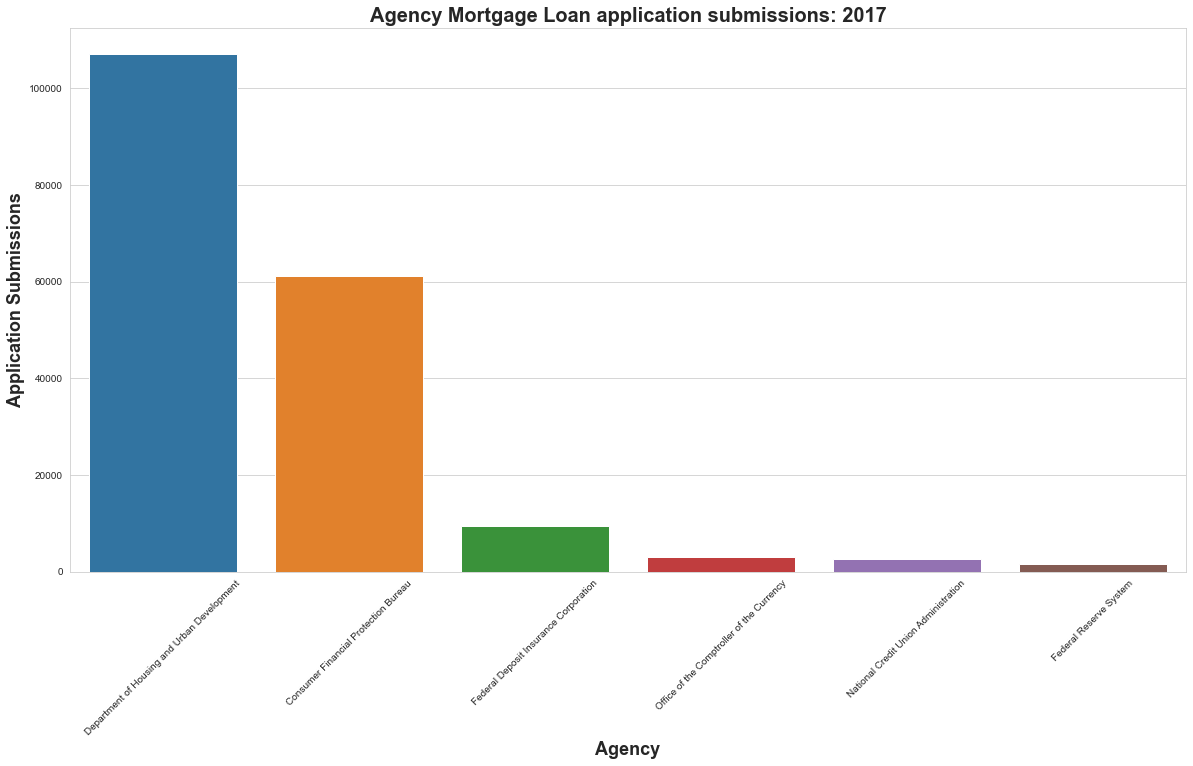

In [33]:
# Highest number of agency names Applicants: Top 10
fig1, ax1 = plt.subplots(figsize = (20,10))
ax1 = sns.barplot(x=df_hp.agency_name.value_counts().index,
                 y=df_hp.agency_name.value_counts())
ax1.set_ylabel('Application Submissions', fontsize=18, weight='semibold')
ax1.set_xlabel('Agency', fontsize=18, weight='semibold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)
ax1.set_title('Agency Mortgage Loan application submissions: 2017', fontsize=20, weight='bold')
plt.savefig('Agency.png', dpi=100, bbox_inches='tight')

1. HUD : FHA loans
2. CFPB : Government agency built to protect consumers
3. FDIC : Regulates and audits full service banks
4. OCC : OCC charters, regulates, and supervises all national banks and federal savings associations as well as federal branches and agencies of foreign banks. 
5. NCUA :  the National Credit Union Administration is an independent federal agency that insures deposits at federally insured credit unions


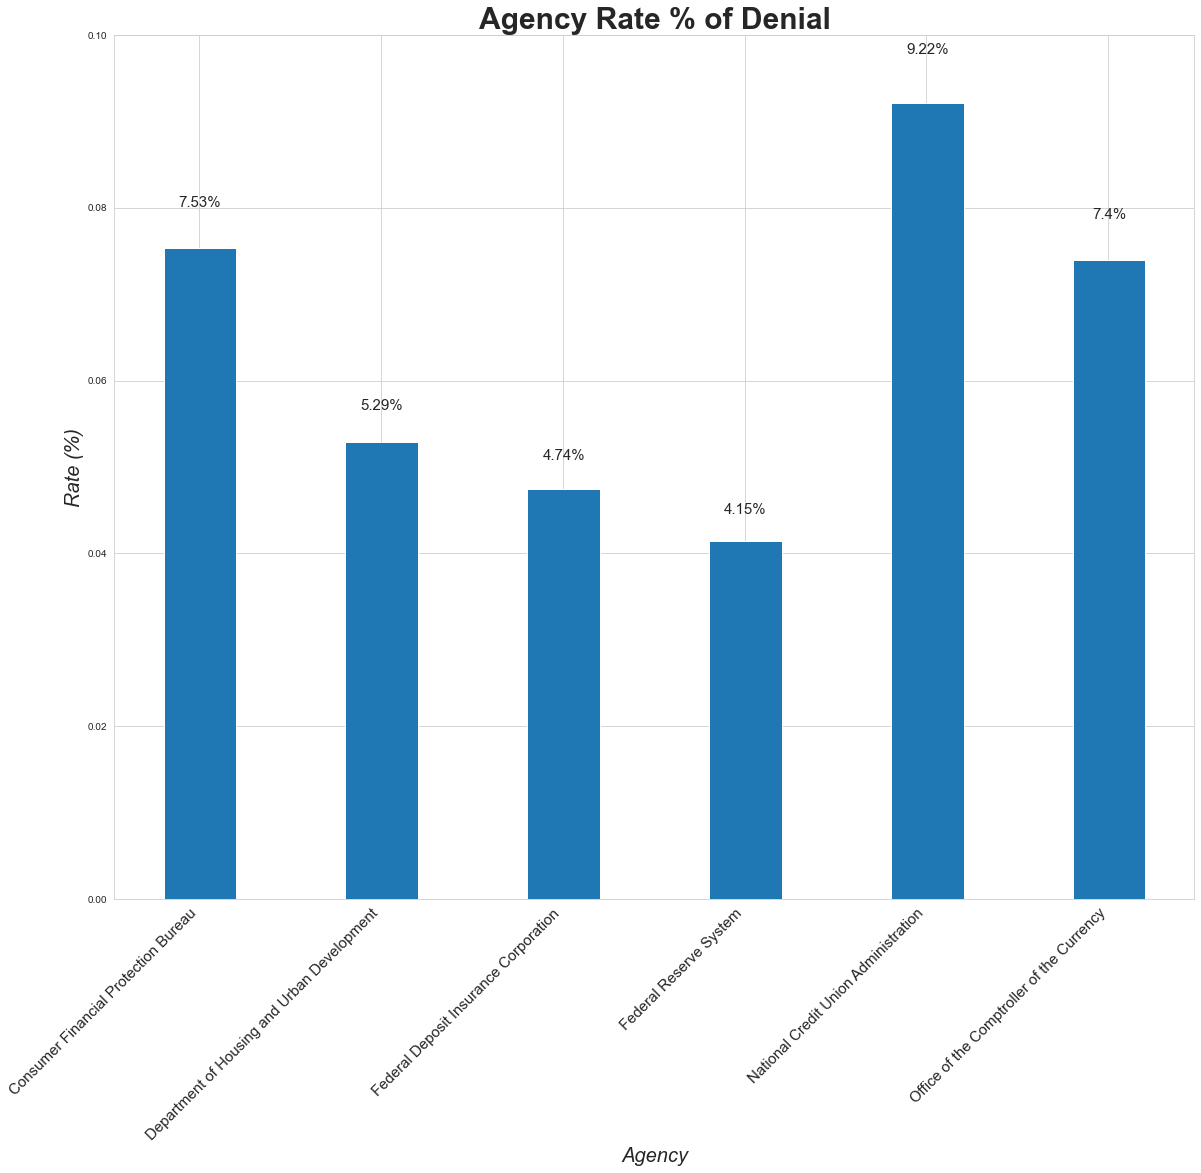

In [42]:
rate_barplot(df_hp['agency_name'], 'Denial', 'Agency Rate % of Denial', 'Agency', 'Rate (%)', 0.1, 0.40, 'Agency_denial.png')

The main reason why National Credit Union Administration might have a higher denial rate is due to Credit Union membership requirements. Often times locking a mortgage loan through a credit union offer better rates than your typical bank. Look into your local credit union banks and see their memebership requirements. 

### Does the purchaser type affect the ability to get approved for a loan.

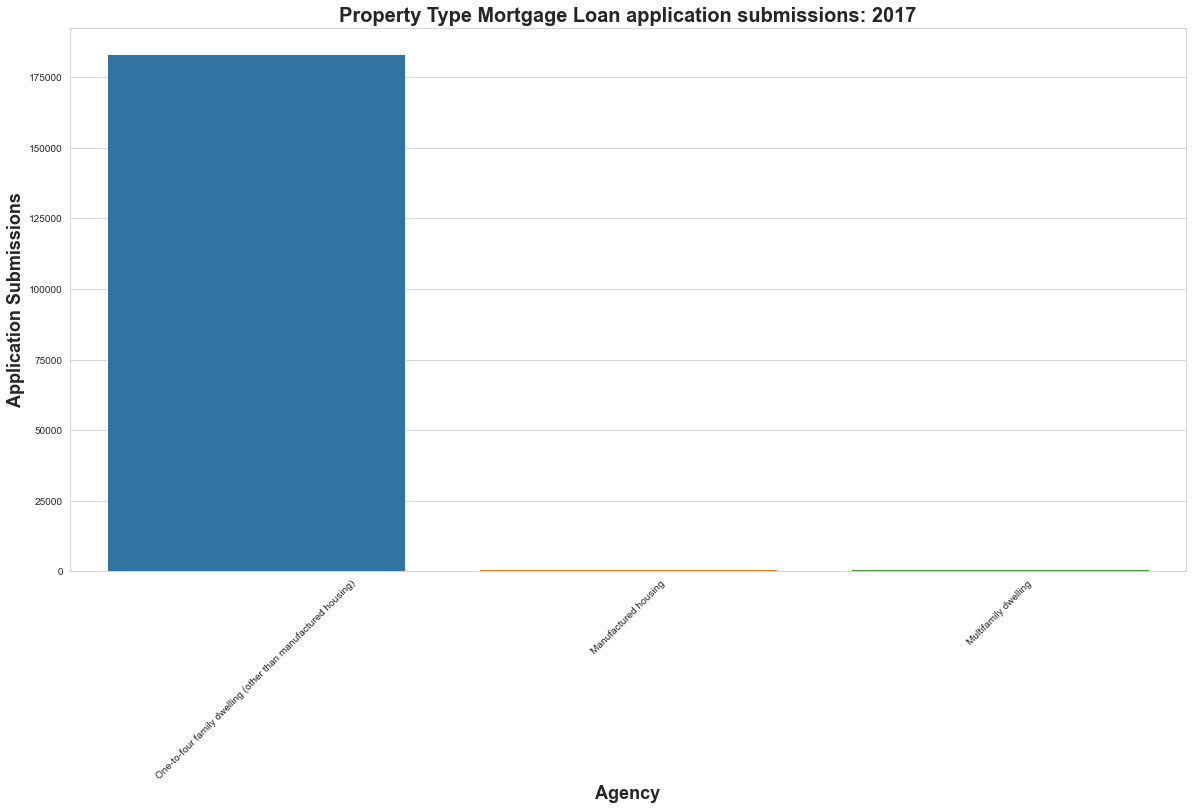

In [39]:
# Highest number of agency names Applicants: Top 10
fig, ax0 = plt.subplots(figsize = (20,10))
ax0 = sns.barplot(x=df_hp.property_type_name.value_counts().index,
                 y=df_hp.property_type_name.value_counts())
ax0.set_ylabel('Application Submissions', fontsize=18, weight='semibold')
ax0.set_xlabel('Agency', fontsize=18, weight='semibold')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)
ax0.set_title('Property Type Mortgage Loan application submissions: 2017', fontsize=20, weight='bold')
plt.savefig('Property_type.png', dpi=100, bbox_inches='tight')

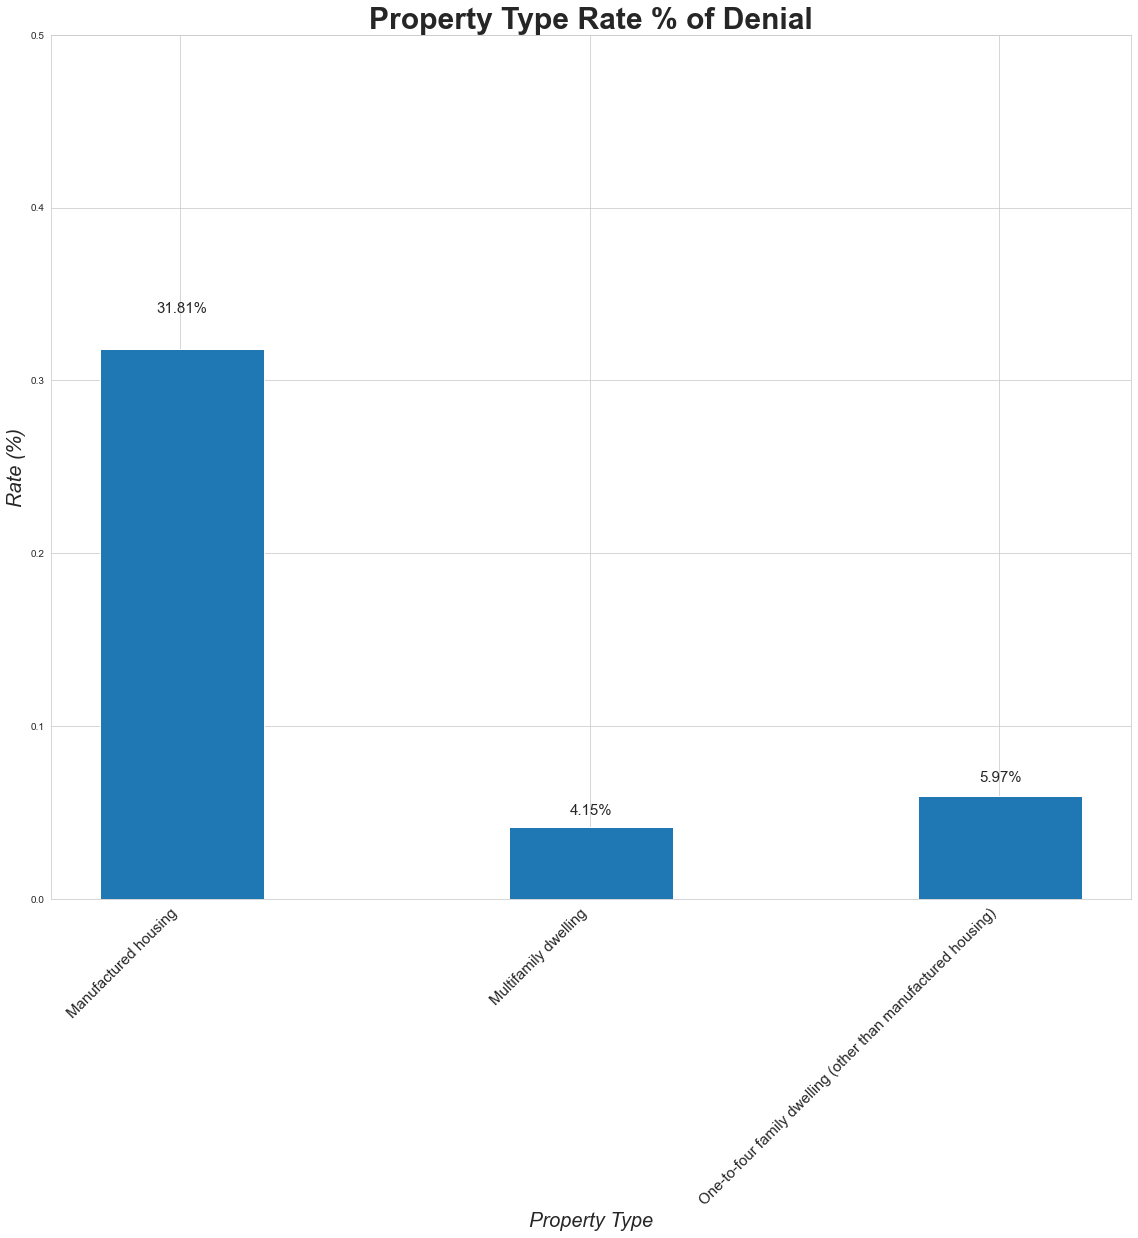

In [43]:
rate_barplot(df_hp['property_type_name'], 'Denial', 'Property Type Rate % of Denial', 'Property Type', 'Rate (%)', 0.50, 0.40, 'Property_type_denial.png')

### Lets look at the rate spread for individuals that have been approved.

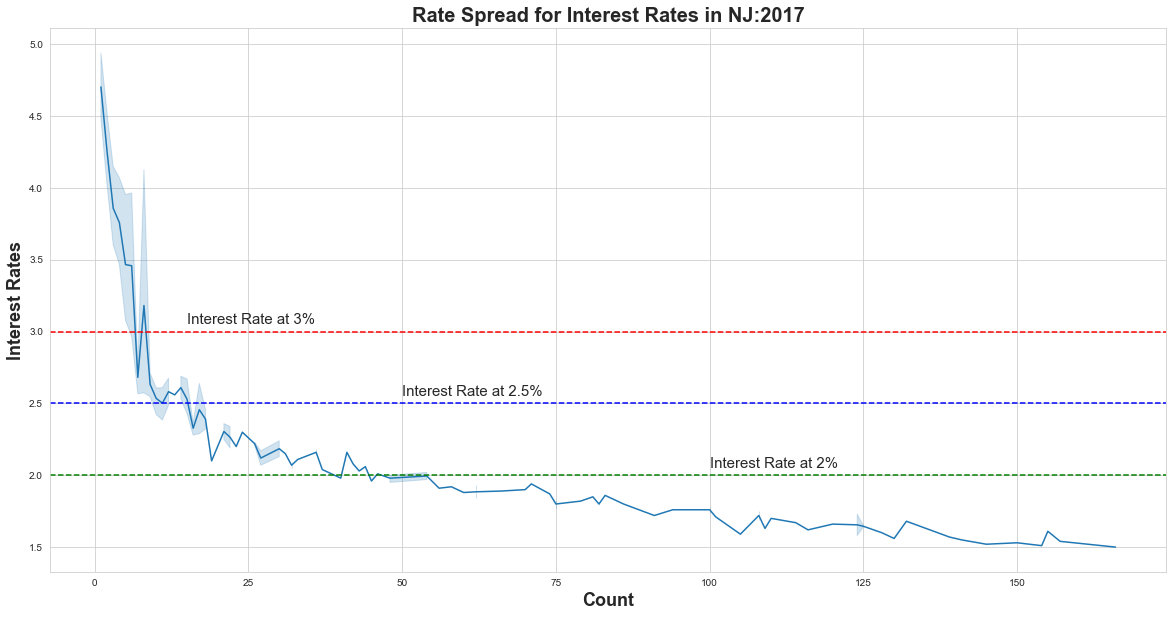

In [44]:
fig3, ax3 = plt.subplots(figsize = (20,10))
ax3 = sns.lineplot(x=df_hp.rate_spread.value_counts(),
                   y=df_hp.rate_spread.value_counts().index)

ax3.axhline(y=3.0, color='r', ls='--')
ax3.text(15,3.05, 'Interest Rate at 3%', fontsize=15)
ax3.axhline(y=2.5, color='b', ls='--')
ax3.text(50,2.55, 'Interest Rate at 2.5%', fontsize=15)
ax3.axhline(y=2.0, color='g', ls='--')
ax3.text(100,2.05, 'Interest Rate at 2%', fontsize=15)

ax3.set_ylabel('Interest Rates', fontsize=18, weight='semibold')
ax3.set_xlabel('Count', fontsize=18, weight='semibold')
ax3.set_title('Rate Spread for Interest Rates in NJ:2017', fontsize=20, weight='bold')
plt.savefig('rate_spread.png', dpi=100, bbox_inches='tight')

### What is the most common reason for being denied

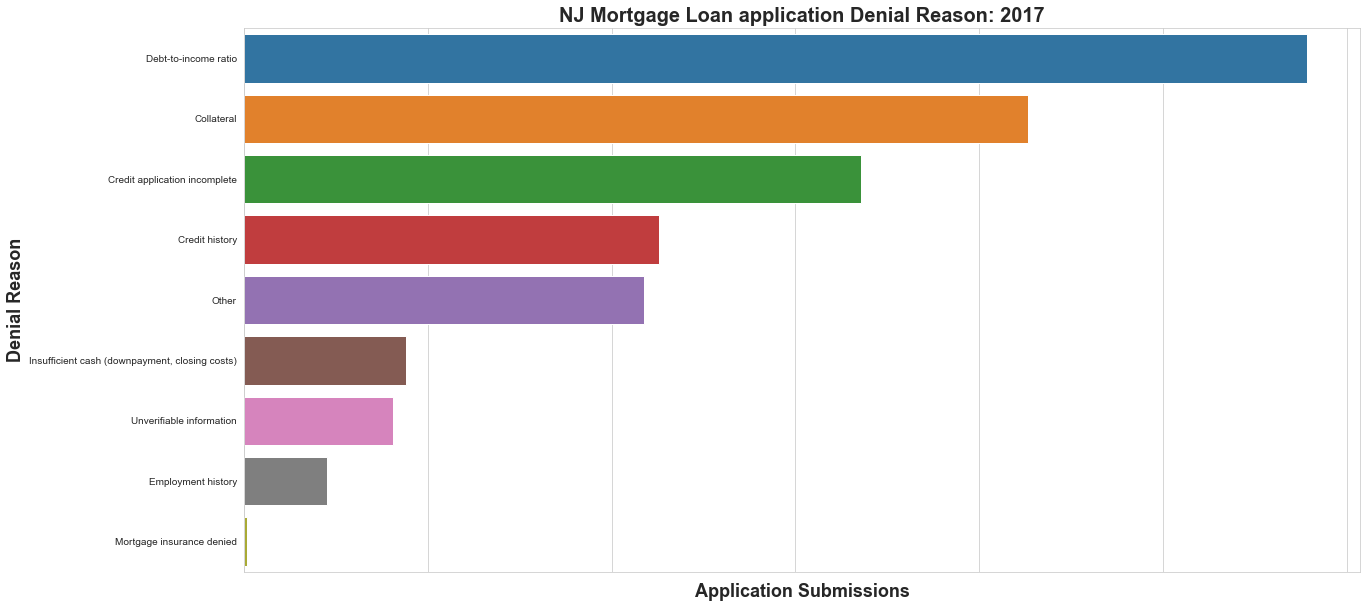

In [45]:
# Highest number of agency names Applicants: Top 10
fig4, ax4 = plt.subplots(figsize = (20,10))
ax4 = sns.barplot(x=df_hp.loc[df_hp.denial_reason_name_1 != 'None'].denial_reason_name_1.value_counts(normalize=True),
                  y=df_hp.loc[df_hp.denial_reason_name_1 != 'None'].denial_reason_name_1.value_counts().index)
ax4.set_ylabel('Denial Reason', fontsize=18, weight='semibold')
ax4.set_xlabel('Application Submissions', fontsize=18, weight='semibold')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 45)
ax4.set_title('NJ Mortgage Loan application Denial Reason: 2017', fontsize=20, weight='bold')
plt.savefig('denial_reason.png', dpi=100, bbox_inches='tight')

### I ) Denial Reason:Grouped by sex

In [58]:
pd.crosstab(df_hp['applicant_sex_name'], df_hp['denial'])

denial,0,1
applicant_sex_name,,
Female,42150,3306
Male,94295,6799


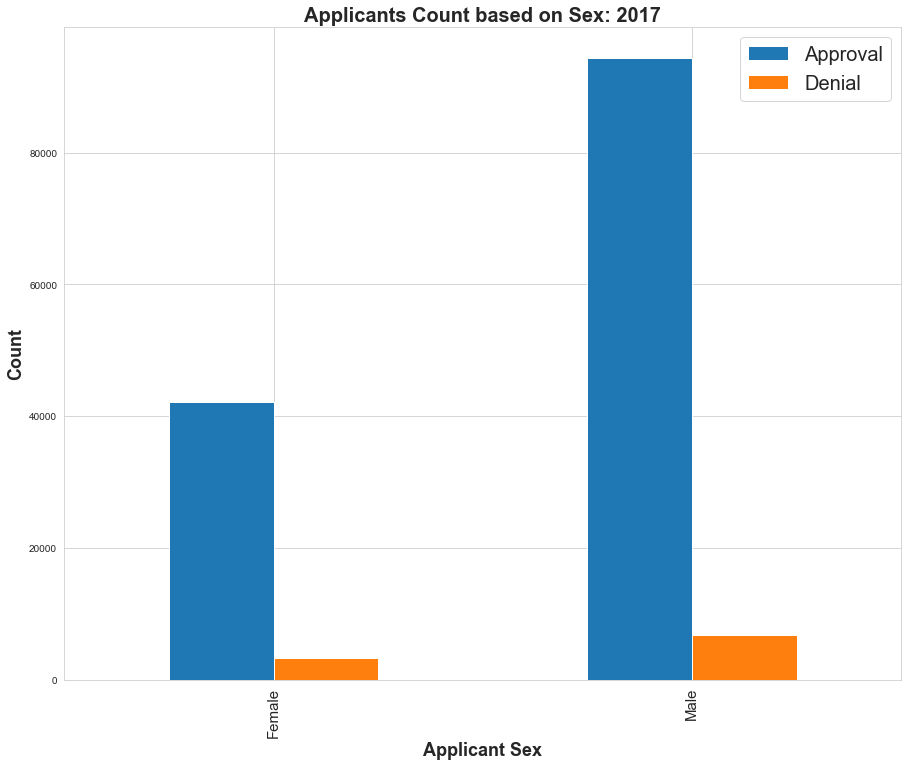

In [50]:
labels = ['Female', 'Male']

ax5 = pd.crosstab(df_hp['applicant_sex_name'], df_hp['denial']).plot(kind="bar",figsize=(15,12))
ax5.set_ylabel('Count', fontsize=18, weight='semibold')
ax5.set_xlabel('Applicant Sex', fontsize=18, weight='semibold')
ax5.set_xticklabels(labels, fontsize=15)
ax5.legend(['Approval','Denial'],prop={'size':20})
ax5.set_title('Applicants Count based on Sex: 2017', fontsize=20, weight='bold')
plt.show()


In [52]:
def Denial_reason_rate_per_sex(denial_reason, df, df_sex):
    
    # Find the total count per sex
    Total_female_count = df.applicant_sex_name.value_counts()[1]
    Total_male_count = df.applicant_sex_name.value_counts()[0]
    
    # Find the total count of applicants for input denial reason per sex 
    female_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_sex_name'])['denial_reason_name_1'].value_counts()[0]
    male_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_sex_name'])['denial_reason_name_1'].value_counts()[1]
    # Find the Percent of input denial reason per applicant submission based on sex
    female_percent = female_count_dr/Total_female_count
    male_percent = male_count_dr/Total_male_count
    
    data_female = {'Female Percent {}'.format(denial_reason): [female_percent]}
    data_male = {'Male Percent {}'.format(denial_reason): [male_percent]}
    
    df_female = pd.DataFrame(data_female,columns = ['Female Percent {}'.format(denial_reason)])
    df_male = pd.DataFrame(data_male,columns = ['Male Percent {}'.format(denial_reason)])
    
    if df_sex == 'male':
        return df_male
    if df_sex == 'female':
        return df_female
    

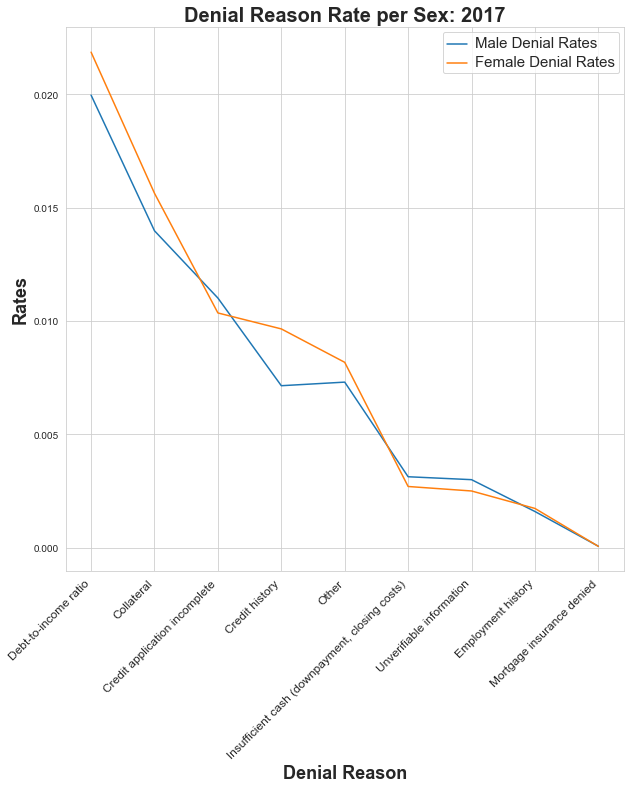

In [53]:
# Have a list of denial reason
denial_reason = df_hp.denial_reason_name_1.value_counts().index.tolist()
# Have a lsit of denial rates
rates_male = []
rates_female = []
# append to lsit
for i in denial_reason:
    rates_male.append(Denial_reason_rate_per_sex(i, df_hp, 'male').iloc[0][0])
    rates_female.append(Denial_reason_rate_per_sex(i, df_hp, 'female').iloc[0][0])
    
data_men = {'Male denial reason': denial_reason,
            'Rates':rates_male}
df_men = pd.DataFrame(data_men)
df_men.drop([0], inplace=True)

data_fem = {'Female denial reason': denial_reason,
            'Rates':rates_female}
df_fem = pd.DataFrame(data_fem)
df_fem.drop([0], inplace=True)
    
fig6, ax6 = plt.subplots(figsize = (10,10))
ax6 = sns.lineplot(data=df_men, x='Male denial reason', y='Rates', label='Male Denial Rates')
ax6 = sns.lineplot(data=df_fem, x='Female denial reason', y='Rates', label='Female Denial Rates')

ax6.set_ylabel('Rates', fontsize=18, weight='semibold')
ax6.set_xlabel('Denial Reason', fontsize=18, weight='semibold')
ax6.set_xticklabels(denial_reason[1::],rotation = 45,
                   horizontalalignment='right',
                   fontweight='light',
                   fontsize='large')
plt.setp(ax6.get_legend().get_texts(), fontsize='15')
ax6.set_title('Denial Reason Rate per Sex: 2017', fontsize=20, weight='bold')
plt.savefig('denial_reason_sex.png', dpi=100, bbox_inches='tight')

### II ) Denial Reason:Grouped by Ethnicity

In [57]:
pd.crosstab(df_hp['applicant_ethnicity_name'], df_hp['denial'])

denial,0,1
applicant_ethnicity_name,,
Hispanic or Latino,16868,1615
Not Hispanic or Latino,113319,7903


Text(0.5, 1.0, 'Applicants Count based on Ethnicity: 2017')

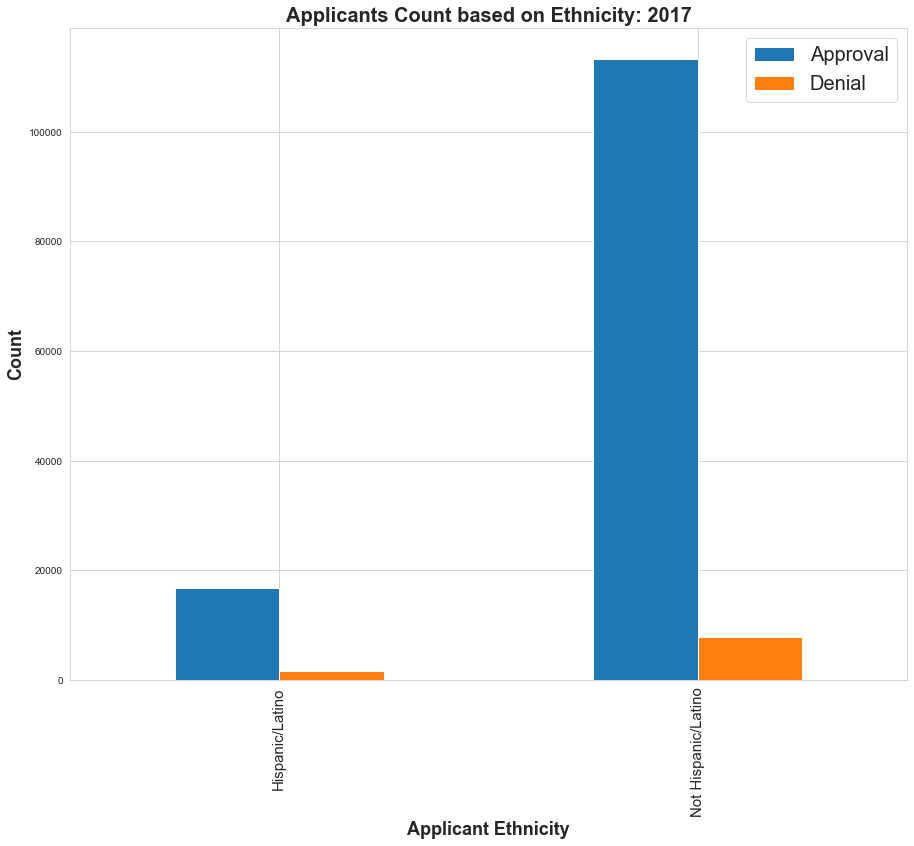

In [42]:
labels = ['Hispanic/Latino', 'Not Hispanic/Latino']

ax7 = pd.crosstab(df_hp['applicant_ethnicity_name'], df_hp['denial']).plot(kind="bar",figsize=(15,12))
ax7.set_ylabel('Count', fontsize=18, weight='semibold')
ax7.set_xlabel('Applicant Ethnicity', fontsize=18, weight='semibold')
ax7.set_xticklabels(labels, fontsize=15)
ax7.legend(['Approval','Denial'],prop={'size':20})
ax7.set_title('Applicants Count based on Ethnicity: 2017', fontsize=20, weight='bold')

In [55]:
def Denial_reason_rate_per_ethnicity(denial_reason, df, df_ethnicity):
    
    # Find the total count per ethnicity
    Total_hl_count = df.applicant_ethnicity_name.value_counts()[1]
    Total_not_hl_count = df.applicant_ethnicity_name.value_counts()[0]
    
    # Find the total count of applicants for input denial reason per ethnicity
    hl_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_ethnicity_name'])['denial_reason_name_1'].value_counts()[0]
    not_hl_count_dr = df.loc[df.denial_reason_name_1 == denial_reason].groupby(by=['applicant_ethnicity_name'])['denial_reason_name_1'].value_counts()[1]
    # Find the Percent of input denial reason per applicant submission based on ethnicity
    hl_percent = hl_count_dr/Total_hl_count
    not_hl_percent = not_hl_count_dr/Total_not_hl_count
    
    data_hl = {'Hispanic_Latino Percent {}'.format(denial_reason): [hl_percent]}
    data_not_hl = {'Not_HL Percent {}'.format(denial_reason): [not_hl_percent]}
    
    df_hl = pd.DataFrame(data_hl,columns = ['Hispanic_Latino Percent {}'.format(denial_reason)])
    df_not_hl = pd.DataFrame(data_not_hl,columns = ['Not_HL Percent {}'.format(denial_reason)])
    
    if df_ethnicity == 'not_hl':
        return df_not_hl
    if df_ethnicity == 'hl':
        return df_hl

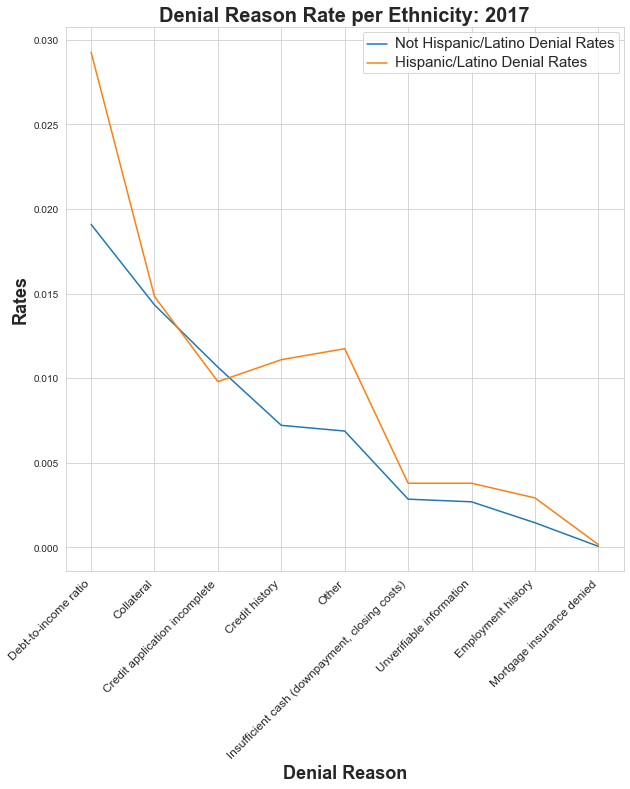

In [56]:
# Have a list of denial reason
denial_reason = df_hp.denial_reason_name_1.value_counts().index.tolist()
# Have a lsit of denial rates
rates_not_hl = []
rates_hl = []
# append to lsit
for i in denial_reason:
    rates_not_hl.append(Denial_reason_rate_per_ethnicity(i, df_hp, 'not_hl').iloc[0][0])
    rates_hl.append(Denial_reason_rate_per_ethnicity(i, df_hp, 'hl').iloc[0][0])
    
data_not_hl = {'Not Hispanic_Latino denial reason': denial_reason,
            'Rates':rates_not_hl}
df_not_hl = pd.DataFrame(data_not_hl)
df_not_hl.drop([0], inplace=True)

data_hl = {'Hispanic_Latino denial reason': denial_reason,
            'Rates':rates_hl}
df_hl = pd.DataFrame(data_hl)
df_hl.drop([0], inplace=True)
    
fig8, ax8 = plt.subplots(figsize = (10,10))
ax8 = sns.lineplot(data=df_not_hl, x='Not Hispanic_Latino denial reason', y='Rates', label='Not Hispanic/Latino Denial Rates')
ax8 = sns.lineplot(data=df_hl, x='Hispanic_Latino denial reason', y='Rates', label='Hispanic/Latino Denial Rates')

ax8.set_ylabel('Rates', fontsize=18, weight='semibold')
ax8.set_xlabel('Denial Reason', fontsize=18, weight='semibold')
ax8.set_xticklabels(denial_reason[1::],rotation = 45,
                   horizontalalignment='right',
                   fontweight='light',
                   fontsize='large')
plt.setp(ax8.get_legend().get_texts(), fontsize='15')
ax8.set_title('Denial Reason Rate per Ethnicity: 2017', fontsize=20, weight='bold')
plt.savefig('denial_reason_ethnicity.png', dpi=100, bbox_inches='tight')

# Looking in Applicant other Minority groups

In [59]:
print('applicant_race')
print(df_hp.applicant_race_name_1.value_counts())
print(df_hp.applicant_race_name_2.value_counts())
print(df_hp.applicant_race_name_3.value_counts())
print(df_hp.applicant_race_name_4.value_counts())

applicant_race
White                                        106598
Asian                                         18270
Black or African American                     11576
Native Hawaiian or Other Pacific Islander       462
American Indian or Alaska Native                447
Name: applicant_race_name_1, dtype: int64
White                                        587
Black or African American                     87
Asian                                         52
Native Hawaiian or Other Pacific Islander     39
American Indian or Alaska Native              11
Name: applicant_race_name_2, dtype: int64
White                                        31
Black or African American                     9
Native Hawaiian or Other Pacific Islander     4
American Indian or Alaska Native              3
Asian                                         3
Name: applicant_race_name_3, dtype: int64
Native Hawaiian or Other Pacific Islander    3
American Indian or Alaska Native             1
White               

An applicants 2nd, 3rd and 4th race identities represent about 1 percent of their respective race class. For this reason I will just consider every applicants 1st race in this analysis. 

In [60]:
df_hp.drop(['applicant_race_name_2', 'applicant_race_name_3', 'applicant_race_name_4', 'applicant_race_name_5',
         'co_applicant_race_name_2', 'co_applicant_race_name_3', 'co_applicant_race_name_4', 'co_applicant_race_name_5'],
         axis=1, inplace=True)

[Text(0, 0, 'White'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Black or African American'),
 Text(0, 0, 'Native Hawaiian or Other Pacific Islander'),
 Text(0, 0, 'American Indian or Alaska Native')]

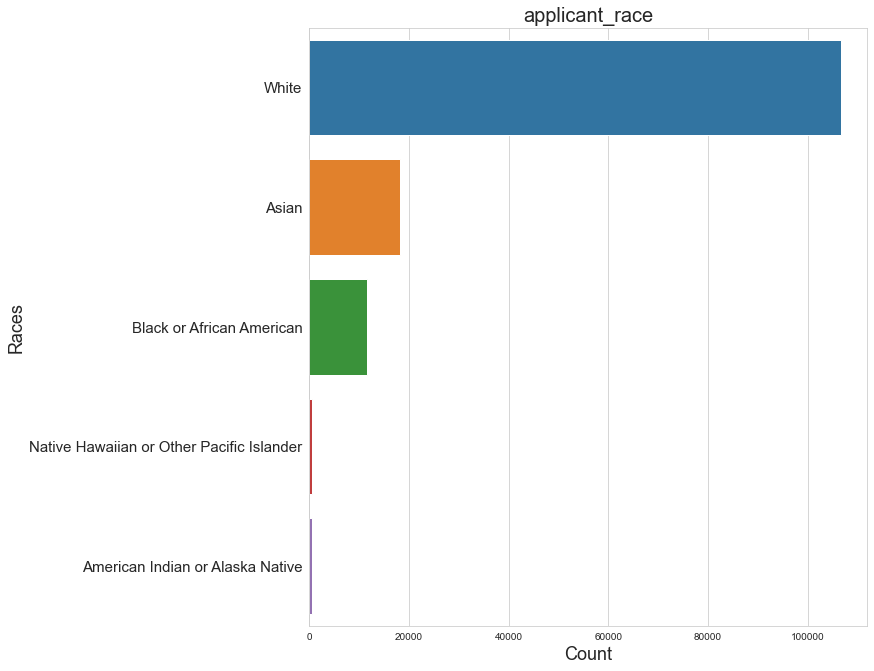

In [61]:
fig, ax1 = plt.subplots(figsize = (10,11))
ax9 = sns.barplot(x=df_hp.applicant_race_name_1.value_counts(),
                   y=df_hp.applicant_race_name_1.value_counts().index,)
                   
ax9.set_ylabel('Races', fontsize=18)
ax9.set_xlabel('Count', fontsize=18)
ax9.set_title('applicant_race', fontsize=20)
ax9.set_yticklabels(ax9.get_ymajorticklabels(), fontsize=15)



# Questions to look into later

1. Does the type of loan affect the ability to be approved for a loan
2. Is being preapproved necessary for obtaining a mortgage loan
3. Does the property type affect thier ability to get a loan
4. Do liens affect the ability to be approved for a loan


# Preprocessing Dataset

In [62]:
# Organize your columns to sections to streamline any repeative changes
cat_few_selection = ['loan_type_name', 'property_type_name', 'owner_occupancy_name', 'preapproval_name','applicant_ethnicity_name',
                     'co_applicant_ethnicity_name','applicant_race_name_1','co_applicant_race_name_1','co_applicant_sex_name',
                     'applicant_sex_name','lien_status_name','hoepa_status_name', 'co_applicant']

cat_many_selection = ['agency_name', 'msamd_name', 'county_name', 'purchaser_type_name']

numerical_cols = ['loan_amount_000s', 'applicant_income_000s', 'population','number_of_owner_occupied_units',
                  'number_of_1_to_4_family_units','minority_population', 'hud_median_family_income','tract_to_msamd_income']

to_drop = ['rate_spread', 'loan_purpose_name', 'denial_reason_name_1',
           'denial_reason_name_2', 'denial_reason_name_3']


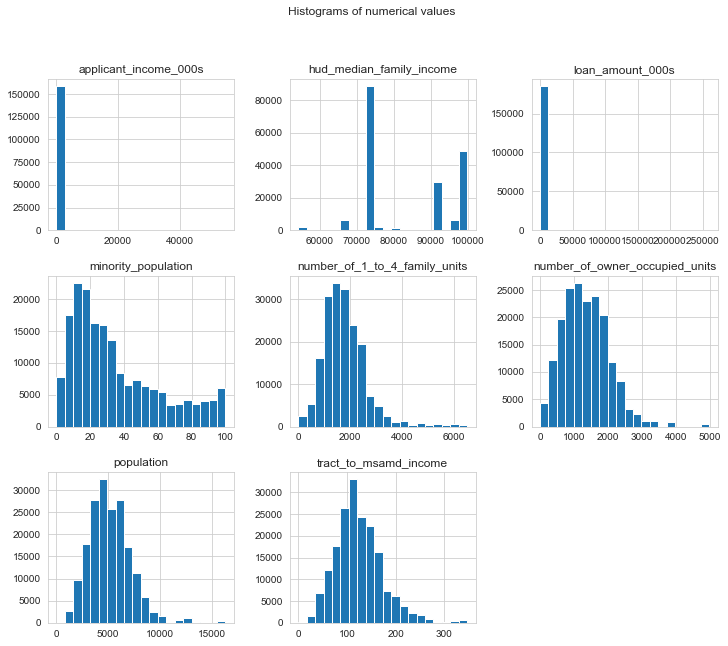

Skewness of numerical columns:


loan_amount_000s                  130.340519
applicant_income_000s              72.996010
population                          0.984326
number_of_owner_occupied_units      0.888454
number_of_1_to_4_family_units       1.672360
minority_population                 0.929498
hud_median_family_income            0.139256
tract_to_msamd_income               0.871230
dtype: float64

In [63]:
# Check all the numerical columns to determine if they are suffering from skewness
df_hp[numerical_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of numerical values")
plt.show()

print("Skewness of numerical columns:")
df_hp[numerical_cols].skew()

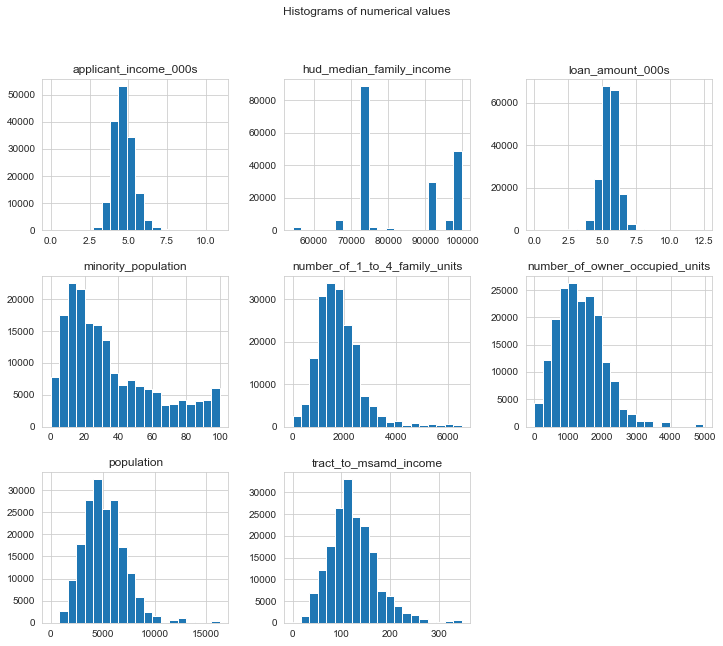

Skewness of numerical columns after applying log function:


<Figure size 432x288 with 0 Axes>

In [64]:
import math
to_log = ["loan_amount_000s", "applicant_income_000s"]
df_hp[to_log] = df_hp[to_log].applymap(math.log)

df_hp[numerical_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of numerical values")
plt.show()

print("Skewness of numerical columns after applying log function:")
df_hp[numerical_cols].skew()
plt.tight_layout()

Skewness of numerical columns:


loan_amount_000s                 -0.803214
applicant_income_000s             0.505688
population                        0.984326
number_of_owner_occupied_units    0.888454
number_of_1_to_4_family_units     1.672360
minority_population               0.929498
hud_median_family_income          0.139256
tract_to_msamd_income             0.871230
dtype: float64

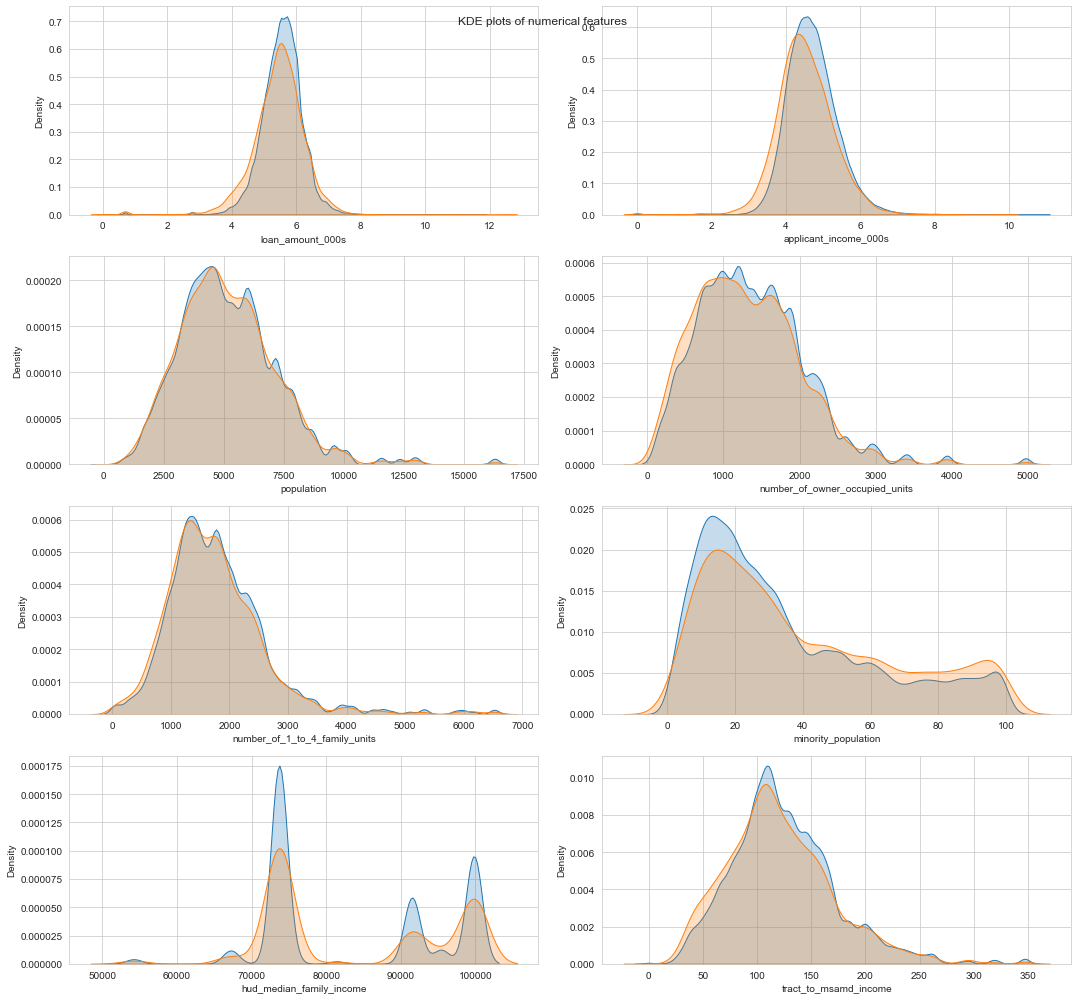

In [65]:
fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize = (15,14))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("KDE plots of numerical features")

for ax, col in zip(axes.flatten(), numerical_cols) :
    sns.kdeplot(df_hp[df_hp['denial'] == 0][col], shade="True", label="Accepted", ax = ax)
    sns.kdeplot(df_hp[df_hp['denial'] == 1][col], shade="True", label="Not Accepted", ax = ax)
    ax.set_xlabel(col)
plt.tight_layout()

print("Skewness of numerical columns:")
df_hp[numerical_cols].skew()

### From these graphs I was able to notice that the feature minority_population is actually given in percent.

In [66]:
# Create a new column that is does not represent the minority population by its estimated number
df_hp['minority_population_'] = (df_hp['minority_population'] / 100) * (df_hp['population'])
df_hp['minority_population_'].fillna(df_hp['minority_population_'].median(), inplace=True)
df_hp['minority_population_'].replace(0.0, 0.1, inplace=True)
df_hp['minority_population_'] = (df_hp['minority_population_']).apply(math.log)

Skewness of Minority Population:


-1.2393837481219994

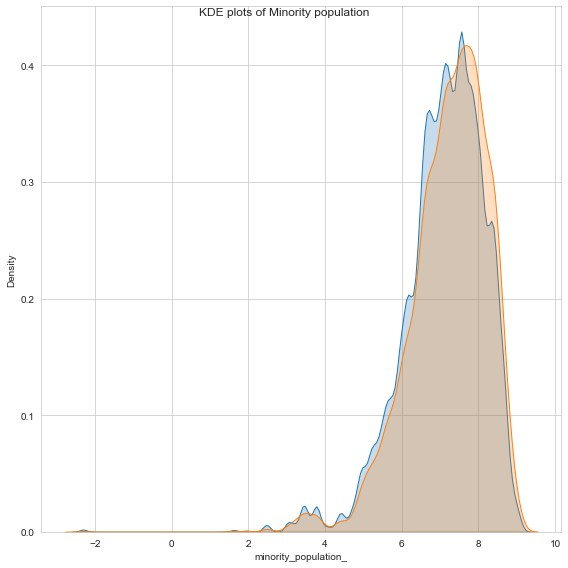

In [67]:
# Create a plot for this new column
fig, ax = plt.subplots(figsize = (8,8))
fig.suptitle("KDE plots of Minority population")

sns.kdeplot(df_hp[df_hp['denial'] == 0]['minority_population_'], shade="True", label="Accepted", ax = ax)
sns.kdeplot(df_hp[df_hp['denial'] == 1]['minority_population_'], shade="True", label="Not Accepted", ax = ax)
ax.set_xlabel('minority_population_')
plt.tight_layout()

print("Skewness of Minority Population:")
df_hp['minority_population_'].skew()

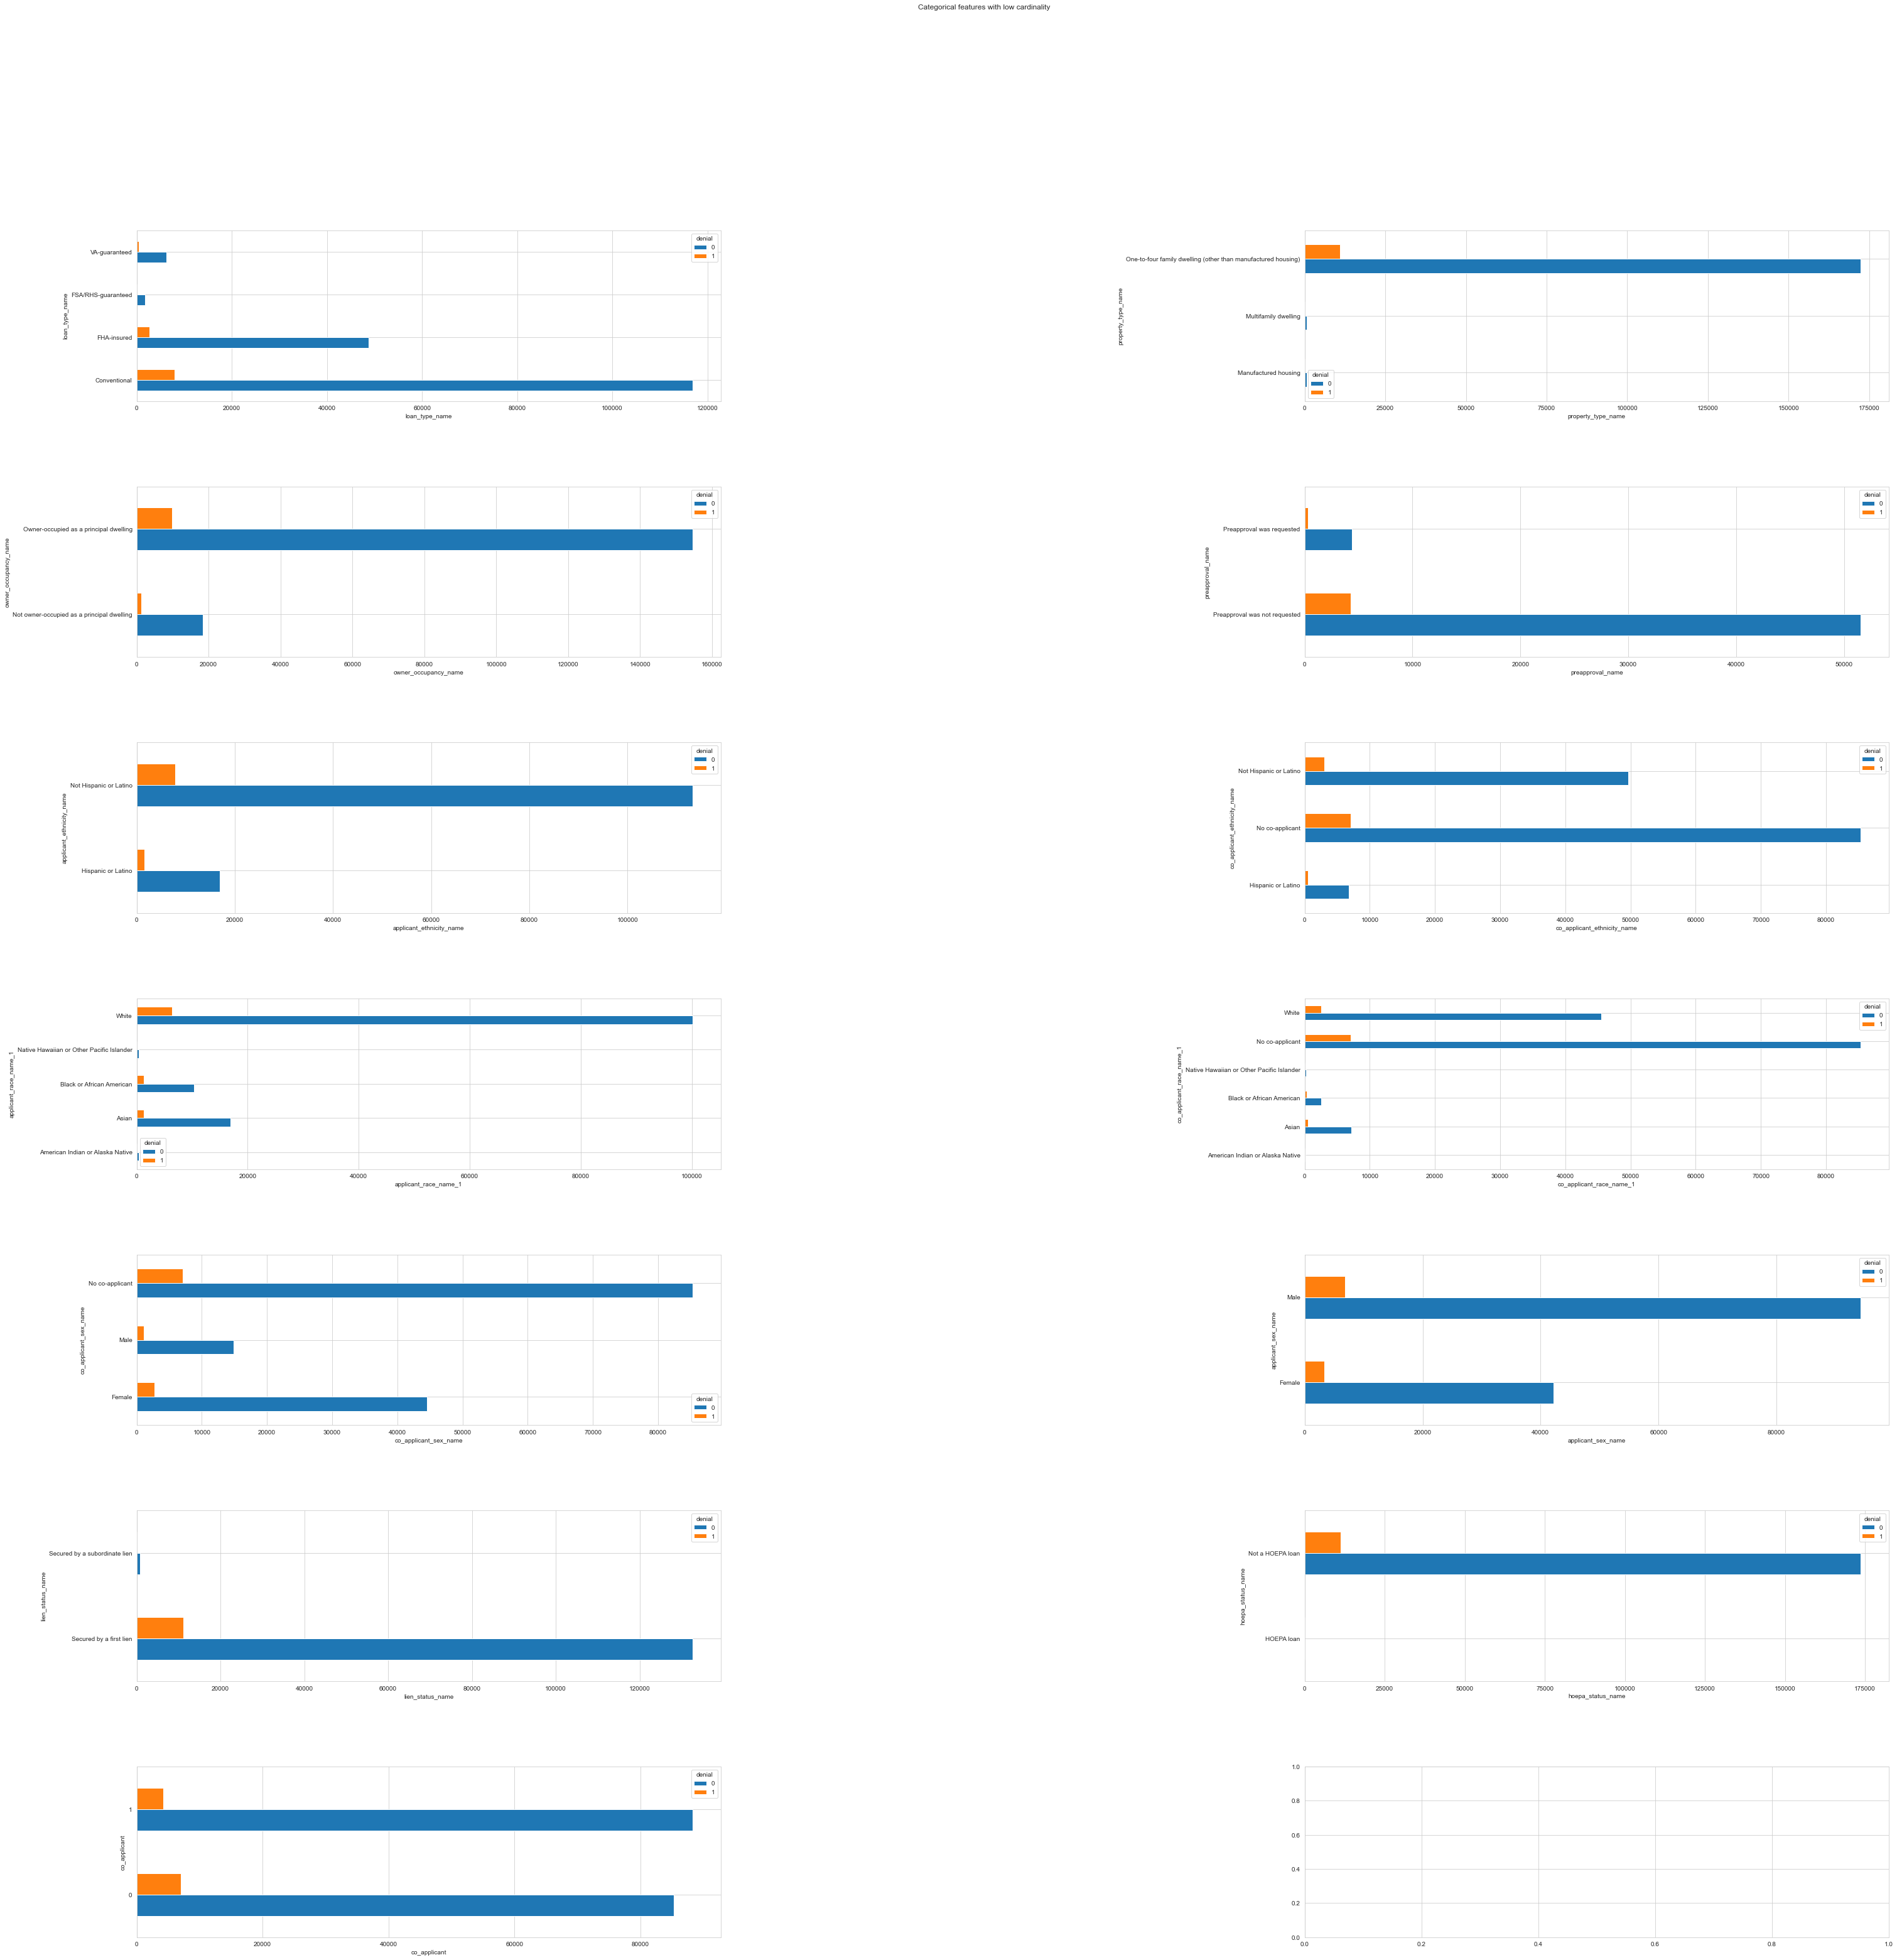

In [68]:
# Take a quick look at all the categorical data
fig, axes = plt.subplots(ncols = 2, nrows = 7, figsize = (50,50))
fig.subplots_adjust(hspace = .5, wspace = 1)
fig.suptitle("Categorical features with low cardinality")

for ax, col in zip(axes.flatten(), cat_few_selection) :
    pd.crosstab(df_hp[col], df_hp['denial']).plot(kind="barh", ax = ax)
    ax.set_xlabel(col)


In [69]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

#instatiate LabelEncoder
le = LabelEncoder()

df_hp_processed = df_hp.copy()

for col in cat_many_selection:
    df_hp_processed[col] = le.fit_transform(df_hp_processed[col])
for col in cat_few_selection:
    df_hp_processed[col] = le.fit_transform(df_hp_processed[col])

In [70]:
def check_column(column_name, df_1, df_2):
    ''' Looking at the columns that need to be dropped '''
    print(df_1[column_name].value_counts())
    print('----------------------------------')
    print(df_2[column_name].value_counts())

In [71]:
check_column('co_applicant_sex_name', df_hp, df_hp_processed)

No co-applicant    92373
Female             47231
Male               15946
Name: co_applicant_sex_name, dtype: int64
----------------------------------
2    92373
0    47231
3    29406
1    15946
Name: co_applicant_sex_name, dtype: int64


The following columns will be dropped for the following:

1. replace the numbers that represent Nan 
2. No co-applicant, a column was already established for this 

1)'applicant_ethnicity_name_2','co_applicant_ethnicity_name_3',
'applicant_sex_name_2', , 'co_applicant_sex_name_3', 
'applicant_race_name_1_5', 'co_applicant_race_name_1_6',
'owner_occupancy_name_2',
'lien_status_name_2'

2) 'co_applicant_ethnicity_name_1', 'co_applicant_sex_name_2', 'co_applicant_race_name_1_4', 'preapproval_name_2'

In [72]:
# Replace
replace_dict = {
    'applicant_ethnicity_name': [2],
    'co_applicant_ethnicity_name': [3],
    'applicant_sex_name': [2],
    'co_applicant_sex_name': [3],
    'applicant_race_name_1':[5],
    'co_applicant_race_name_1':[6],
    'lien_status_name': [2],
    'owner_occupancy_name': [2]
    }

df_hp_processed.replace(replace_dict, np.nan, inplace=True)

In [73]:
# Replace the NaN with thier specified central tendency
for col in numerical_cols:
    df_hp_processed[col].fillna(df_hp_processed[col].median(), inplace=True)
for col in cat_many_selection:
    df_hp_processed[col].fillna(df_hp_processed[col].median(), inplace=True)
for col in cat_few_selection:
    df_hp_processed[col].fillna(df_hp_processed[col].mode(), inplace=True)
# Drop action_taken_name: It represents repeative information that can be made from the denial column and does not serve this analyse
df_hp_processed.drop(to_drop, axis=1, inplace=True)

df_hp_processed= pd.get_dummies(df_hp_processed, drop_first=True, columns = cat_few_selection)

In [74]:
df_hp_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184956 entries, 0 to 184955
Data columns (total 40 columns):
agency_name                        184956 non-null int32
loan_amount_000s                   184956 non-null float64
msamd_name                         184956 non-null int32
county_name                        184956 non-null int32
applicant_income_000s              184956 non-null float64
purchaser_type_name                184956 non-null int32
population                         184956 non-null float64
minority_population                184956 non-null float64
hud_median_family_income           184956 non-null float64
tract_to_msamd_income              184956 non-null float64
number_of_owner_occupied_units     184956 non-null float64
number_of_1_to_4_family_units      184956 non-null float64
denial                             184956 non-null int64
minority_population_               184956 non-null float64
loan_type_name_1                   184956 non-null uint8
loan_type_name_2

In [75]:
df_hp_processed.drop([ 'co_applicant_ethnicity_name_1.0', 'co_applicant_sex_name_2.0', 'co_applicant_race_name_1_4.0',
                       'preapproval_name_2'], axis=1, inplace=True)

In [76]:
df_hp_processed.columns= df_hp_processed.columns.str.replace('.0','')

In [77]:
df_hp_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184956 entries, 0 to 184955
Data columns (total 36 columns):
agency_name                       184956 non-null int32
loan_amounts                      184956 non-null float64
msamd_name                        184956 non-null int32
county_name                       184956 non-null int32
applicant_incomes                 184956 non-null float64
purchaser_type_name               184956 non-null int32
population                        184956 non-null float64
minority_population               184956 non-null float64
hud_median_family_income          184956 non-null float64
tract_to_msamd_income             184956 non-null float64
number_of_owner_occupied_units    184956 non-null float64
number_of_1_to_4_family_units     184956 non-null float64
denial                            184956 non-null int64
minority_population_              184956 non-null float64
loan_type_name_1                  184956 non-null uint8
loan_type_name_2               

In [78]:
df_hp_processed.isna().sum().any()

False

# Create training and test sets

In [79]:
from sklearn.model_selection import train_test_split
# Sperate your X and y variable
y = df_hp_processed.denial
X = df_hp_processed.drop(['denial'], axis=1)
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data

In [80]:
# Import StandardScalar
from sklearn.preprocessing import StandardScaler

# Instatiate StandScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create data frame
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_train.head()

,agency_name,loan_amounts,msamd_name,county_name,applicant_incomes,purchaser_type_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,...,applicant_race_name_1_4,co_applicant_race_name_1_1,co_applicant_race_name_1_2,co_applicant_race_name_1_3,co_applicant_race_name_1_5,co_applicant_sex_name_1,applicant_sex_name_1,lien_status_name_1,hoepa_status_name_1,co_applicant_1
0,-0.955279,-0.204018,1.43847,-0.944955,-1.161285,-1.490568,-0.616805,-0.125611,-0.844908,-1.812507,...,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301,0.999387
1,0.174273,0.745642,-0.21211,-1.465882,0.174274,0.827948,0.489685,0.151118,-0.820448,-0.352869,...,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,0.911847,-0.073581,0.009301,0.999387
2,0.174273,0.145641,-1.03740,-1.118597,0.530653,0.827948,-1.292748,-0.768635,0.630882,0.643090,...,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,-1.096675,-0.073581,0.009301,0.999387
3,0.174273,0.198503,-0.21211,0.965112,0.302109,0.364245,-0.088295,0.616928,-0.820448,-0.821094,...,0.859553,-0.209287,-0.125294,-0.033554,1.692045,3.256116,0.911847,-0.073581,0.009301,0.999387
4,0.174273,0.090856,-1.03740,-1.118597,0.213710,1.291651,-0.838690,-0.256130,0.630882,-0.433868,...,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301,-1.000613


# Recall vs Precision: In this analysis we will focus on optimizing Recall 

### recall = TP / (TP + FN)
### precision = TP / (TP + FP)

- False Negative suggest that the model predicted that an individual that should have been denied got approved for a loan 
- False Positive suggest that the model predicted that an individual that should have been approved got denied for a loan 

In conclusion, a false negative in this case would effect the banks more than that of a false positive. 

# Fit a KNN model

In [82]:
# Import KNeighborsClassifer
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf_KNN = KNeighborsClassifier()

# fit Classifer
clf_KNN.fit(scaled_X_train, y_train)

# Predict on the test set 

y_preds_KNN = clf_KNN.predict(scaled_X_test)

In [83]:
#Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

# Check performance Metrics 
performance_metrics_KNN= print_metrics(y_test, y_preds_KNN)


The accuracy is :0.94

AUC is :0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     43437
           1       0.30      0.05      0.08      2802

    accuracy                           0.94     46239
   macro avg       0.62      0.52      0.52     46239
weighted avg       0.90      0.94      0.91     46239



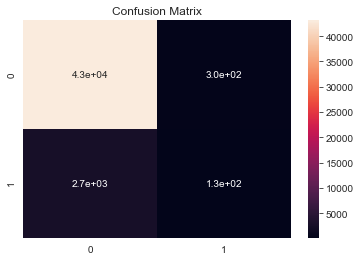

In [84]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_KNN)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_KNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print your accuracy_score, classification report, and confusion matrix 

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test, y_preds_KNN))

sns.heatmap(confusion_matrix(y_test, y_preds_KNN), annot=True)
plt.title("Confusion Matrix")
plt.show()

Results: From evaluating the performance metrics we can see that this model is terrible at predicting the target variable. The problem might be the imbalance that is present in the target variable. 

# Dealing with Imbalanced Class

1. Changing the attribute weight= 'distance'

In [85]:
# Instantiate KNeighborsClassifier
clf_KNN = KNeighborsClassifier(weights='distance')

# fit Classifer
clf_KNN.fit(scaled_X_train, y_train)

# Predict on the test set 

y_preds_KNN = clf_KNN.predict(scaled_X_test)

In [86]:
# Check performance Metrics 
performance_metrics_KNN= print_metrics(y_test, y_preds_KNN)

Precision Score: 0.2776998597475456
Recall Score: 0.07066381156316917
Accuracy Score: 0.9325461190769696
F1 Score: 0.11266002844950213


The accuracy is :0.93

AUC is :0.53

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     43437
           1       0.28      0.07      0.11      2802

    accuracy                           0.93     46239
   macro avg       0.61      0.53      0.54     46239
weighted avg       0.90      0.93      0.91     46239



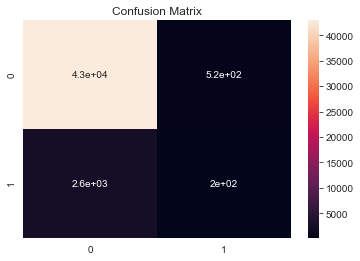

In [87]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_KNN)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_KNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Print your accuracy_score, classification report, and confusion matrix 

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test, y_preds_KNN))

sns.heatmap(confusion_matrix(y_test, y_preds_KNN), annot=True)
plt.title("Confusion Matrix")
plt.show()

# Fit a Decision Tree (class_weight='balanced')

In [81]:
# Instantiate DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(random_state=10, class_weight='balanced')

# fit classifer
clf_Decision_Tree.fit(scaled_X_train, y_train)

# predict  on the test set 
y_preds_Decision_Tree = clf_Decision_Tree.predict(scaled_X_test)

In [84]:
# Metric
print('Using the Descison Tree Method weighted:')
performance_metrics_Decision_Tree = print_metrics(y_test, y_preds_Decision_Tree)

Using the Descison Tree Method weighted:
Precision Score: 0.2100656455142232
Recall Score: 0.20556745182012848
Accuracy Score: 0.9050152468695257
F1 Score: 0.2077922077922078


The accuracy is :0.91

AUC is :0.58

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     43437
           1       0.21      0.21      0.21      2802

    accuracy                           0.91     46239
   macro avg       0.58      0.58      0.58     46239
weighted avg       0.90      0.91      0.90     46239



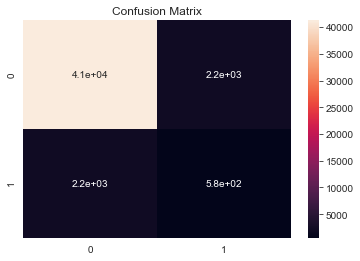

In [88]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_Decision_Tree)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_Decision_Tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_preds_Decision_Tree))

sns.heatmap(confusion_matrix(y_test, y_preds_Decision_Tree), annot=True)
plt.title('Confusion Matrix')
plt.show()

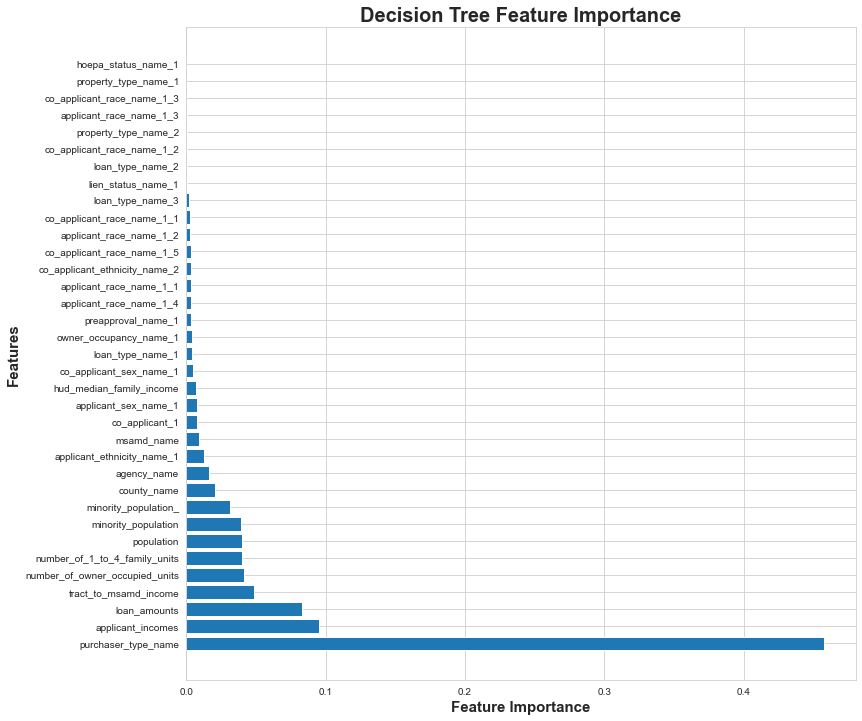

<Figure size 432x288 with 0 Axes>

In [89]:
# Plotting Feature importances
def important_features(model, columns):
    ''' Plots the important features of a decision tree in decending order'''
    #The top features of the model
    top_features = model.feature_importances_
    #creating a list of column names
    feature_names=columns
    #Sort feature importances in decending order
    indices= np.argsort(top_features)[::-1]
    #Rearrange Feature names so they match the sorted feature importance
    names= [feature_names[i] for i in indices]
    #Create number of features
    n_features = X_train.shape[1]
    #Create plot
    plt.figure(figsize=(12,12))
    #Create horizontal bar chart
    plt.barh(range(n_features), top_features[indices], align='center')
    #X and y labels
    plt.xlabel("Feature Importance", fontsize=15, weight='semibold')
    plt.ylabel("Features", fontsize=15, weight='semibold')
    # Add feature names as y-axis labels
    plt.yticks(range(n_features), names)
    #Add title
    plt.title('Decision Tree Feature Importance', fontsize=20, weight='bold')
    plt.show()
    
important_features(clf_Decision_Tree,X.columns.tolist())
plt.tight_layout()

# Feature Engineering part 2 

In [90]:
# Create a copy of the dataframe that was used in your first initial models
df_2 = df_hp.copy()

In [91]:
# Creating the individual features for the denial reasons

# Create index column
df_2['index'] = df_hp.index

# Create a list of all the denial reasons
denial_reason= df_hp.denial_reason_name_1.unique().tolist()[1::]

# Create a function that classifies whether an applicant was denied for input denial_reason
def modified_dataframe(denial_reason, df):
    ''' Creates a function that locates whether an applicant was denied for input denial_reason, if it was it gets counted on
         a new df'''
    # Locate if an applicant got denied for input denial reason
    df_new = df.loc[(df.denial_reason_name_1 == denial_reason) | (df.denial_reason_name_2 == denial_reason) |
                    (df.denial_reason_name_3 == denial_reason)]
    # Create new dataframe that counts 1 for the applicants that were found to have input denial reason
    df_new[denial_reason] = [1 for i in range(0, df_new.shape[0])]
    
    return df_new

# Merge this new dataframe onto the original dataframe
for i in denial_reason:
    df_2 = pd.merge(df_2, modified_dataframe(i, df_2).loc[:,['index', i]], on='index', how='outer')



In [92]:
#Replace all the unnecessary stuff from column names 
df_2.columns = df_2.columns.str.replace(' ','_')
df_2.columns = df_2.columns.str.replace('-','_')
df_2.columns = df_2.columns.str.replace('(downpayment,_closing_costs)','')
df_2.columns = df_2.columns.str.replace('(','')
df_2.columns = df_2.columns.str.replace(')','')

In [93]:
#check the columns
df_2.columns

Index(['agency_name', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'msamd_name', 'county_name',
       'applicant_ethnicity_name', 'co_applicant_ethnicity_name',
       'applicant_race_name_1', 'co_applicant_race_name_1',
       'applicant_sex_name', 'co_applicant_sex_name', 'applicant_income_000s',
       'purchaser_type_name', 'denial_reason_name_1', 'denial_reason_name_2',
       'denial_reason_name_3', 'rate_spread', 'hoepa_status_name',
       'lien_status_name', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'denial', 'co_applicant', 'minority_population_', 'index',
       'Insufficient_cash_', 'Debt_to_income_ratio', 'Other', 'Credit_history',
       'Unverifiable_information', 'Collateral',
       'Credit_application_incomplete', 'Employment_history',
     

In [94]:
replace_dict = {
    'Insufficient_cash_': np.nan,
    'Debt_to_income_ratio': np.nan,
    'Other': np.nan,
    'Credit_history': np.nan,
    'Unverifiable_information': np.nan,
    'Collateral': np.nan,
    'Credit_application_incomplete': np.nan,
    'Employment_history': np.nan,
    'Mortgage_insurance_denied': np.nan,
}

df_2.replace(replace_dict, 0, inplace=True)
    

In [95]:
df_2.iloc[:, 31:40].replace(np.nan, 0, inplace=True)

In [96]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184956 entries, 0 to 184955
Data columns (total 42 columns):
agency_name                       184956 non-null object
loan_type_name                    184956 non-null object
property_type_name                184956 non-null object
loan_purpose_name                 184956 non-null object
owner_occupancy_name              184270 non-null object
loan_amount_000s                  184928 non-null float64
preapproval_name                  60546 non-null object
msamd_name                        184332 non-null object
county_name                       184373 non-null object
applicant_ethnicity_name          139705 non-null object
co_applicant_ethnicity_name       152319 non-null object
applicant_race_name_1             137353 non-null object
co_applicant_race_name_1          151437 non-null object
applicant_sex_name                146550 non-null object
co_applicant_sex_name             155550 non-null object
applicant_income_000s             

From these new features we will select those that are denial reasons with no other option. 
- Unverifiable information : There is no way a lender will authurize an approved loan if information is not given. 
- Credit application incomplete : This fall in the same scenario. A lender will deny the loan application. 
- Mortgage insurance denied : This suggest that the applicant did not recieve the loan, thus being rejected the insurance
- Other : This to will be dropped from the model. There is no way to really understand this feature and it can be different meaning. 

# Preprocessing Data part 2

In [97]:
# Organize your columns to sections to streamline any repeative changes
cat_few_selection = ['loan_type_name', 'property_type_name', 'owner_occupancy_name', 'preapproval_name','applicant_ethnicity_name',
                     'co_applicant_ethnicity_name','applicant_race_name_1','co_applicant_race_name_1','co_applicant_sex_name',
                     'applicant_sex_name','lien_status_name','hoepa_status_name','co_applicant']

cat_many_selection = ['agency_name', 'msamd_name', 'county_name', 'purchaser_type_name']

numerical_cols = ['loan_amount_000s', 'applicant_income_000s', 'population','number_of_owner_occupied_units',
                  'number_of_1_to_4_family_units','minority_population', 'hud_median_family_income','tract_to_msamd_income','minority_population_']

to_drop = ['rate_spread', 'loan_purpose_name', 'denial_reason_name_1',
           'denial_reason_name_2', 'denial_reason_name_3', 'Unverifiable_information',
           'index', 'Credit_application_incomplete', 'Mortgage_insurance_denied', 'Other']

#instatiate LabelEncoder
le = LabelEncoder()

df_2_processed = df_2.copy()

for col in cat_many_selection:
    df_2_processed[col] = le.fit_transform(df_2_processed[col])
for col in cat_few_selection:
    df_2_processed[col] = le.fit_transform(df_2_processed[col])

In [98]:
# Replace
replace_dict = {
    'applicant_ethnicity_name': [2],
    'co_applicant_ethnicity_name': [3],
    'applicant_sex_name': [2],
    'co_applicant_sex_name': [3],
    'applicant_race_name_1':[5],
    'co_applicant_race_name_1':[6],
    'lien_status_name': [2],
    'owner_occupancy_name': [2]
    }

df_2_processed.replace(replace_dict, np.nan, inplace=True)

In [99]:
# Replace the NaN with thier specified central tendency
for col in numerical_cols:
    df_2_processed[col].fillna(df_2_processed[col].median(), inplace=True)
for col in cat_many_selection:
    df_2_processed[col].fillna(df_2_processed[col].median(), inplace=True)
for col in cat_few_selection:
    df_2_processed[col].fillna(df_2_processed[col].mode(), inplace=True)
# Drop action_taken_name: It represents repeative information that can be made from the denial column and does not serve this analyse
df_2_processed.drop(to_drop, axis=1, inplace=True)

df_2_processed= pd.get_dummies(df_2_processed, drop_first=True, columns = cat_few_selection)

In [100]:
df_2_processed.isna().sum().any()

False

In [101]:
df_2_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184956 entries, 0 to 184955
Data columns (total 45 columns):
agency_name                        184956 non-null int32
loan_amount_000s                   184956 non-null float64
msamd_name                         184956 non-null int32
county_name                        184956 non-null int32
applicant_income_000s              184956 non-null float64
purchaser_type_name                184956 non-null int32
population                         184956 non-null float64
minority_population                184956 non-null float64
hud_median_family_income           184956 non-null float64
tract_to_msamd_income              184956 non-null float64
number_of_owner_occupied_units     184956 non-null float64
number_of_1_to_4_family_units      184956 non-null float64
denial                             184956 non-null int64
minority_population_               184956 non-null float64
Insufficient_cash_                 184956 non-null float64
Debt_to_income

In [102]:
df_2_processed.drop([ 'co_applicant_ethnicity_name_1.0', 'co_applicant_sex_name_2.0', 'co_applicant_race_name_1_4.0',
                       'preapproval_name_2'], axis=1, inplace=True)

In [103]:
df_2_processed.columns= df_2_processed.columns.str.replace('.0','')

# Create training and test sets part 2

In [104]:
# Sperate your X and y variable
y = df_2_processed.denial
X = df_2_processed.drop(['denial'], axis=1)
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data part 2

In [105]:
# Instatiate StandScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create data frame
scaled_df_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_df_train.head()

,agency_name,loan_amounts,msamd_name,county_name,applicant_incomes,purchaser_type_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,...,applicant_race_name_1_4,co_applicant_race_name_1_1,co_applicant_race_name_1_2,co_applicant_race_name_1_3,co_applicant_race_name_1_5,co_applicant_sex_name_1,applicant_sex_name_1,lien_status_name_1,hoepa_status_name_1,co_applicant_1
0,-0.955279,-0.204018,1.43847,-0.944955,-1.161285,-1.490568,-0.616805,-0.125611,-0.844908,-1.812507,...,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301,0.999387
1,0.174273,0.745642,-0.21211,-1.465882,0.174274,0.827948,0.489685,0.151118,-0.820448,-0.352869,...,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,0.911847,-0.073581,0.009301,0.999387
2,0.174273,0.145641,-1.03740,-1.118597,0.530653,0.827948,-1.292748,-0.768635,0.630882,0.643090,...,0.859553,-0.209287,-0.125294,-0.033554,1.692045,-0.307114,-1.096675,-0.073581,0.009301,0.999387
3,0.174273,0.198503,-0.21211,0.965112,0.302109,0.364245,-0.088295,0.616928,-0.820448,-0.821094,...,0.859553,-0.209287,-0.125294,-0.033554,1.692045,3.256116,0.911847,-0.073581,0.009301,0.999387
4,0.174273,0.090856,-1.03740,-1.118597,0.213710,1.291651,-0.838690,-0.256130,0.630882,-0.433868,...,-1.163395,-0.209287,-0.125294,-0.033554,-0.591001,-0.307114,-1.096675,-0.073581,0.009301,-1.000613


# Decision Tree (class_weight='balanced') w/ new features (Final Model)

In [133]:
# Instantiate DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(random_state=10, class_weight='balanced')

# fit classifer
clf_Decision_Tree.fit(scaled_X_train, y_train)

# predict  on the test set 
y_preds_Decision_Tree = clf_Decision_Tree.predict(scaled_X_test)

In [134]:
# Metric
print('Using the Descison Tree Method weighted:')
performance_metrics_Decision_Tree = print_metrics(y_test, y_preds_Decision_Tree)

Using the Descison Tree Method weighted:
Precision Score: 0.7229129662522202
Recall Score: 0.7262669521770164
Accuracy Score: 0.9665433941045438
F1 Score: 0.7245860779775681


The accuracy is :0.97

AUC is :0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     43437
           1       0.72      0.73      0.72      2802

    accuracy                           0.97     46239
   macro avg       0.85      0.85      0.85     46239
weighted avg       0.97      0.97      0.97     46239



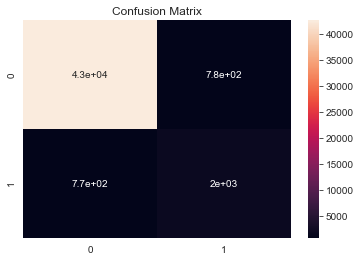

<Figure size 432x288 with 0 Axes>

In [135]:
# Check The accuracy for prediction
acc= accuracy_score(y_test, y_preds_Decision_Tree)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_Decision_Tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_preds_Decision_Tree))

sns.heatmap(confusion_matrix(y_test, y_preds_Decision_Tree), annot=True)
plt.title('Confusion Matrix')
plt.show()
plt.savefig('Confusion_Matrix_final.png', dpi=100, bbox_inches='tight')

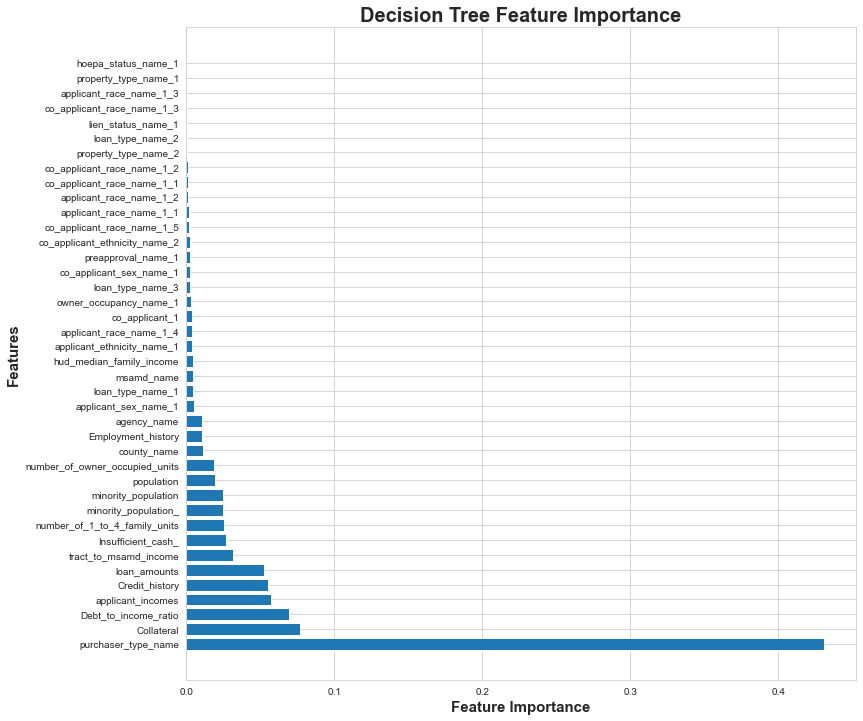

<Figure size 432x288 with 0 Axes>

In [136]:
# Plotting Feature importances
important_features(clf_Decision_Tree,X.columns.tolist())
plt.tight_layout()
plt.savefig('Tree_imp_final.png', dpi=100, bbox_inches='tight')


In [ ]:
# Hypertuning: GridSearchCV 

In [ ]:
#from sklearn.model_selection import GridSearchCV
# Set Parameter for gridsearchCV
#param_dict = {
    #"criterion":['gini', 'entropy'],
    #"max_depth":[5,10,13,15,16,17,18,19,20,23,25,28,30,35],
    #"min_samples_split":range(2,5),
    #"min_samples_leaf":range(1,5)
#}

# finding the best hyperparameter using gridsearchCV

#grid = GridSearchCV(clf_Decision_Tree,
                    #param_grid= param_dict,
                    #scoring='recall',
                    #cv=10,
                    #verbose=1,
                    #n_jobs=-1)

# fitting to the gridsearch
#grid.fit(scaled_X_train, y_train)

In [ ]:
# best parameters
#print('Best params: %s' % grid.best_params_)
# best training data recall
#print('Best recall for training set: %.3f' % grid.best_score_)
# predict from test data
#y_pred_grid = grid.predict(scaled_X_test)
# test data recall with best params
#print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred_grid))
# confusion matrix and classification report
#print('\nClassification Report:')
#print(metrics.classification_report(y_test,y_pred_grid))

#sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True)
#plt.title('Confusion Matrix')
#plt.show()
#print('Recall score: ',recall_score(y_test, y_pred_grid))

# Decision Tree optimized for Recall

In [127]:
# Instantiate DecisionTreeClassifier
clf_Decision_Tree = DecisionTreeClassifier(random_state=10, class_weight='balanced', criterion='gini', max_depth=10,
                                           min_samples_leaf=1, min_samples_split=2)

# fit classifer
clf_Decision_Tree.fit(scaled_X_train, y_train)

# predict  on the test set 
y_preds_Decision_Tree = clf_Decision_Tree.predict(scaled_X_test)

In [130]:
# Metric
print('Using the Descison Tree Method optimized for recall:')
performance_metrics_Decision_Tree = print_metrics(y_test, y_preds_Decision_Tree)

Using the Descison Tree Method optimized for recall:
Precision Score: 0.2945708438666185
Recall Score: 0.8733047822983583
Accuracy Score: 0.8655896537554878
F1 Score: 0.4405437033036277


The accuracy is :0.97

AUC is :0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     43437
           1       0.29      0.87      0.44      2802

    accuracy                           0.87     46239
   macro avg       0.64      0.87      0.68     46239
weighted avg       0.95      0.87      0.89     46239



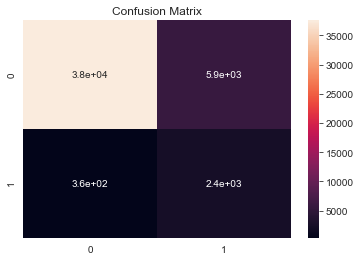

<Figure size 432x288 with 0 Axes>

In [131]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds_Decision_Tree)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('The accuracy is :{0}'.format(round(acc,2)))
print('\nAUC is :{0}'.format(round(roc_auc, 2)))
print('\nClassification Report:')
print(metrics.classification_report(y_test,y_preds_Decision_Tree))

sns.heatmap(confusion_matrix(y_test, y_preds_Decision_Tree), annot=True)
plt.title('Confusion Matrix')
plt.show()
plt.savefig('Confusion_Matrix_recall.png', dpi=100, bbox_inches='tight')

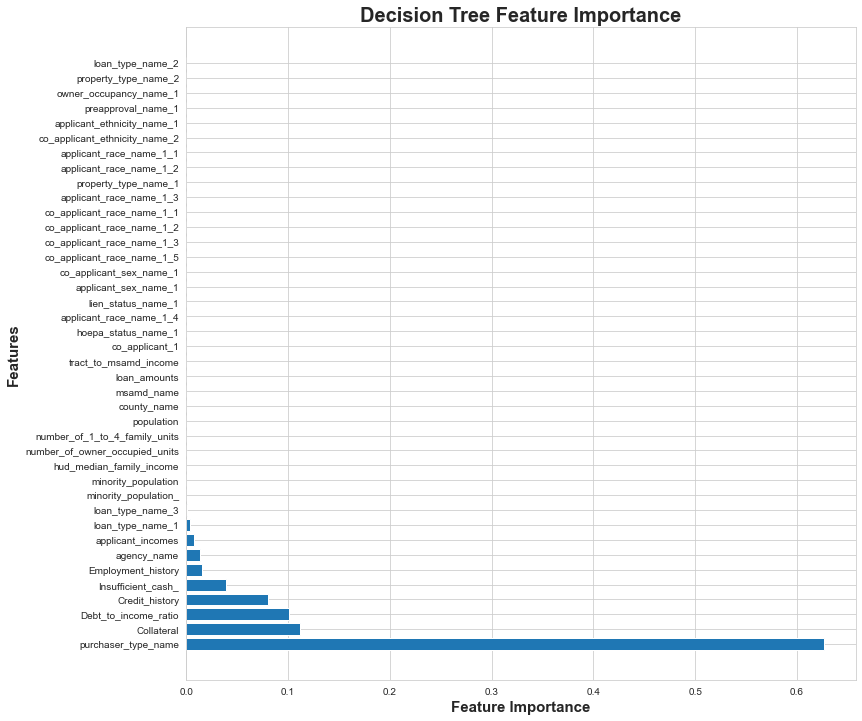

<Figure size 432x288 with 0 Axes>

In [112]:
important_features(clf_Decision_Tree,X.columns.tolist())
plt.tight_layout()
plt.savefig('Final_Tree_imp.png', dpi=100, bbox_inches='tight')

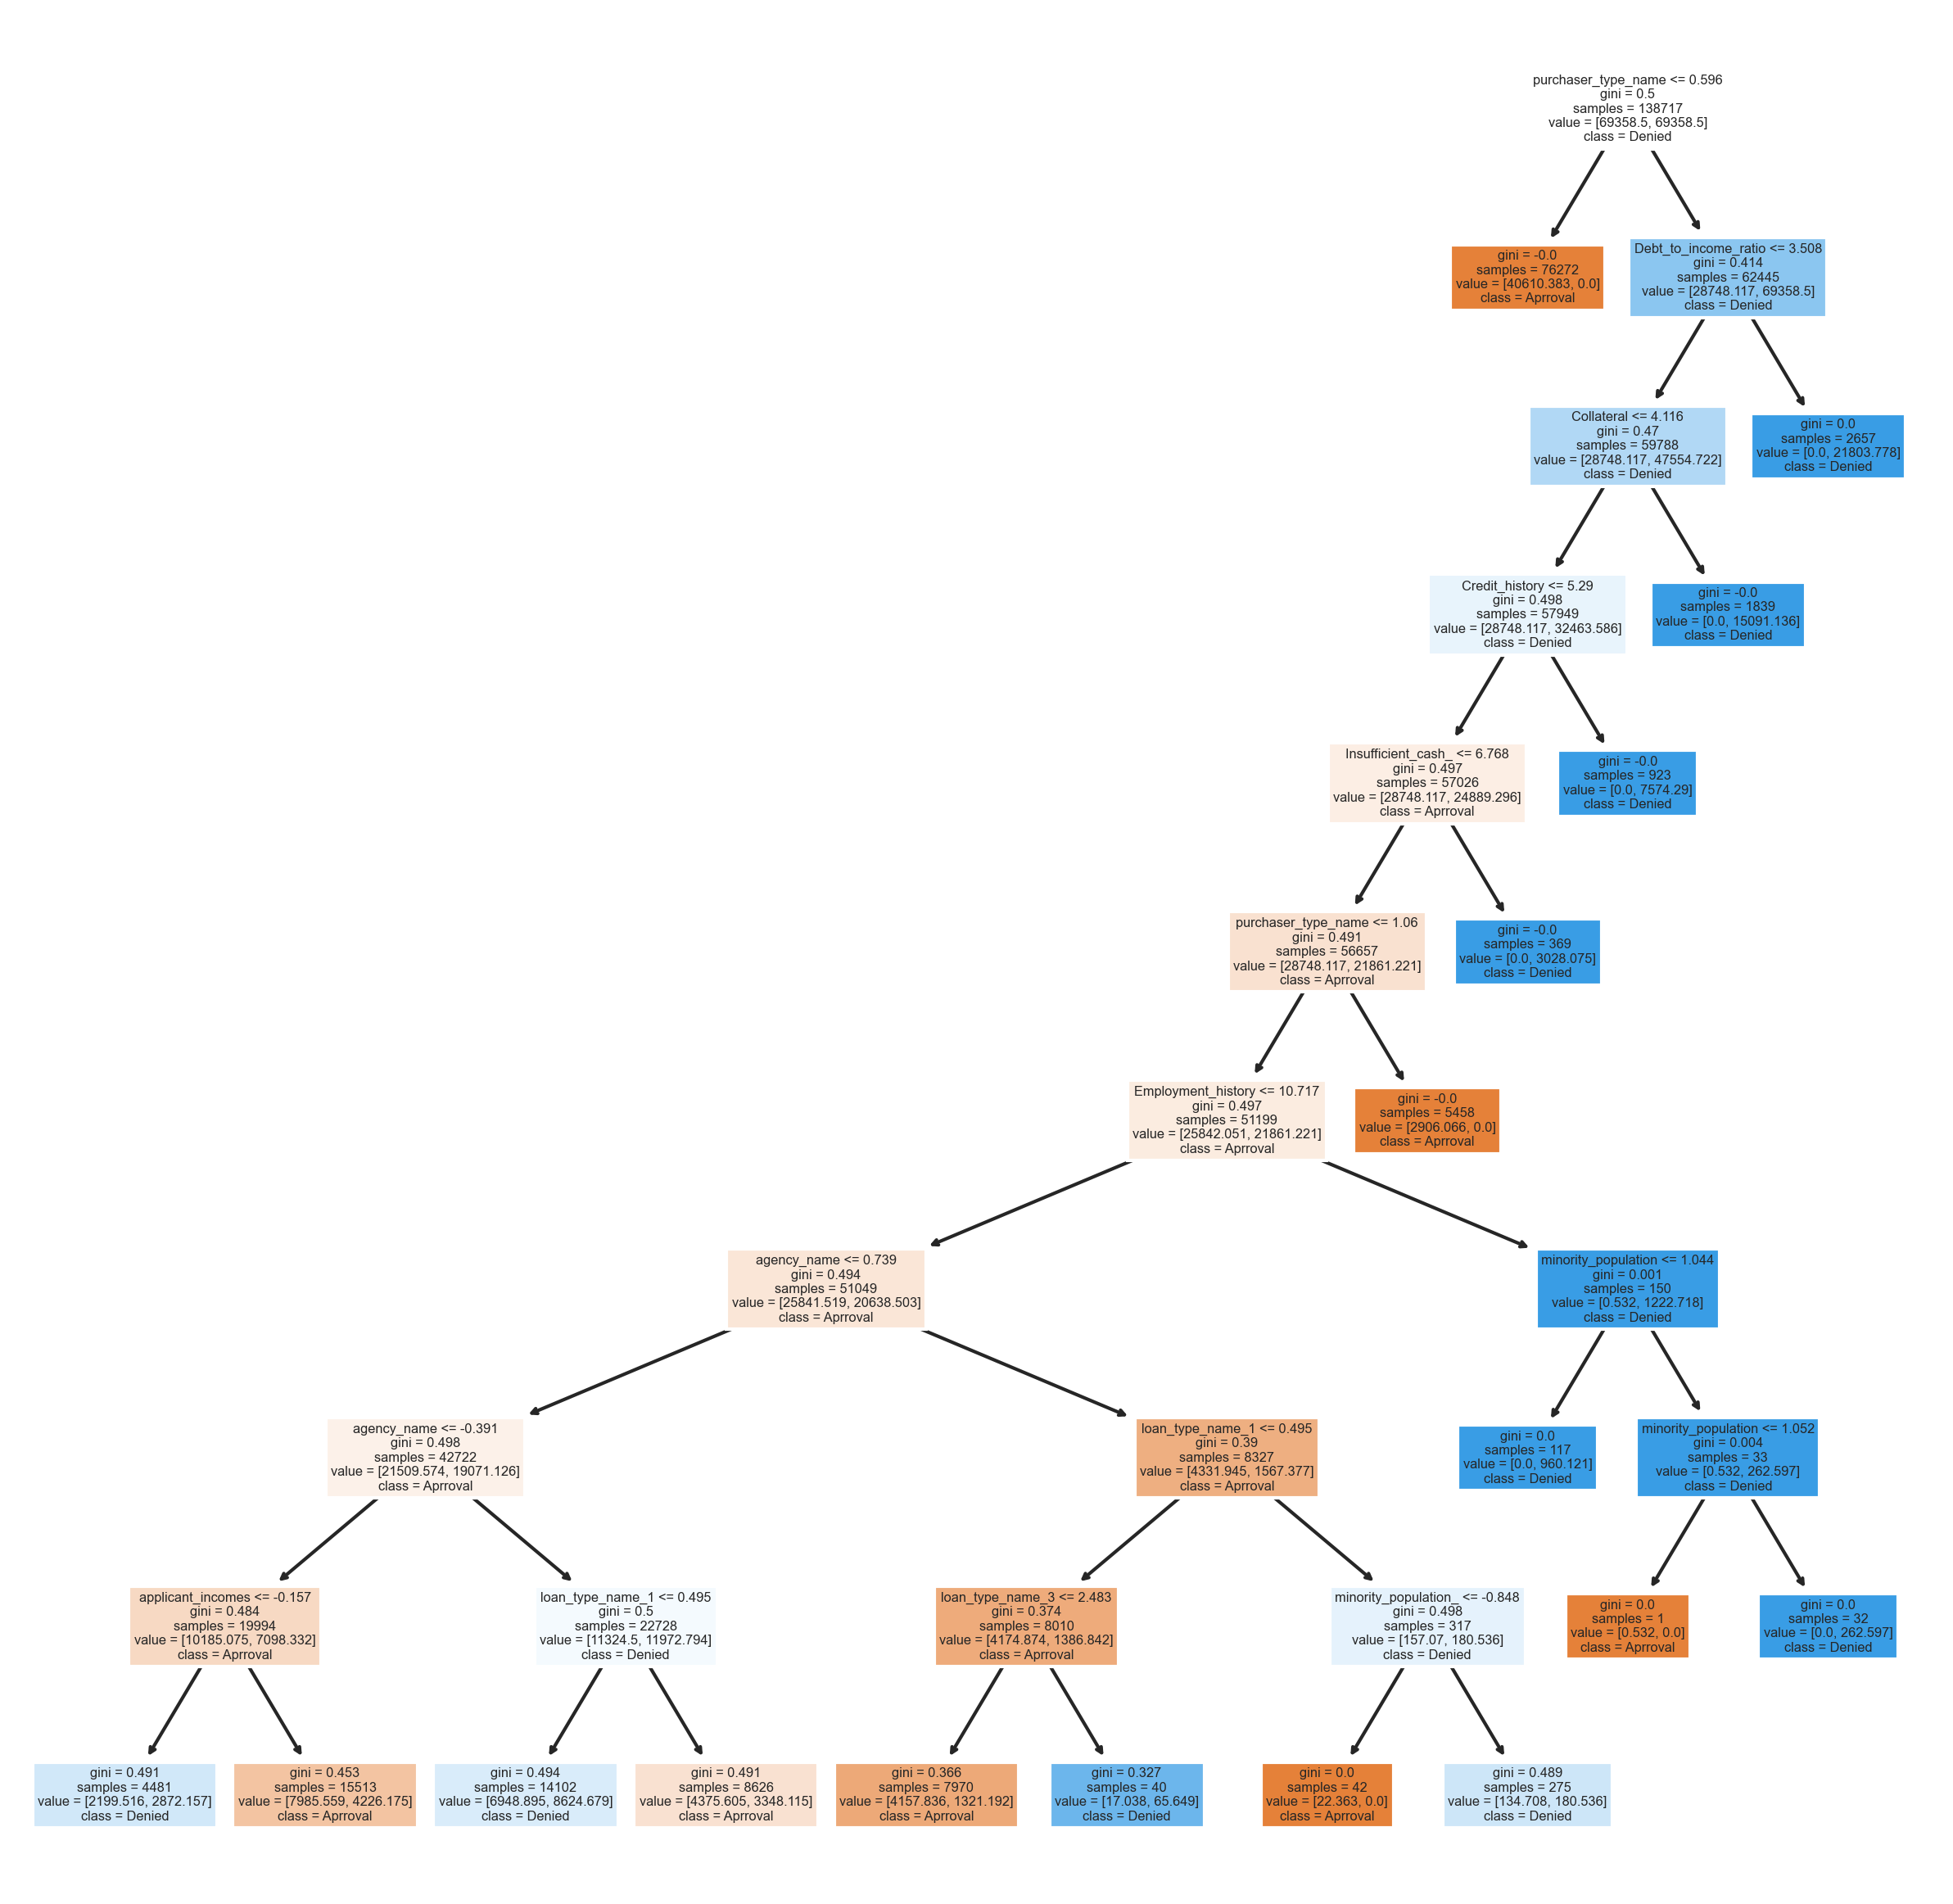

In [113]:
from sklearn import tree
fn=X.columns
cn=['Aprroval', 'Denied']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf_Decision_Tree,
               class_names= cn,
               feature_names= fn,
               filled = True);
plt.savefig('Tree.png', dpi=100, bbox_inches='tight')

# Evaluation

This analysis was comprised of two supervised models that were test. The First model used features that did not include reasons of denial to test if the model would pick up any bias against people of color. These models performed terribly with a Recall of about 5%. 

The next model I decide to use was a Decision Tree and I choose to prioritize recall as the metric to gauge the performance of the model. The goal was to limit the number of false negatives. These false negatives, in terms to our business problem, will predict an applicant as worthy of getting approved for a loan even though they should have been rejected. After the housing market crash in 2008, agencies were developed to ensures that banks pay close attention to the affordability of the loan. This will help borrows from obtaining loans that they can afford and prevent future defaults. 

However, when optimizing for recall I was able to obtain a recall of about 87%. This suggest that out of all applicants that applied for a mortgage loan, only 87% of the denial class were identified. My accuracy had decreased to about 87%, implying that my model’s predictions were only 87% correct. Not only did optimizing for recall cost me a decrease in my accuracy, it also took a heavy blow to my F1 score. When optimizing for recall, a better metric to go by, to know the validity of your model’s performance, is your F1 score. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.

For my final model, I decide to revert to the model before performing a GridSearchCV. In this model I was able to obtain a lower recall of about 73% with an F1 score of 71% which is much more reliable than that of my model where I prioritized recall.

Based on the performance of the model, I reject the null hypothesis that there is no relationship between the HMDA data and a mortgage loan denial.


# Conclusion

In conclusion, the HMDA dataset provides a great resource to gather insights into the process of mortgage lending practices. From just analyzing a given year you can put together actionable recommendations to improve your chances in obtaining a mortgage loan. This machine learning model is like an automated underwriting system used by different lenders. Just like my model there are certain scenarios that will lead the automated underwriting system to deny an applicant of a loan. From here a lender would have to manually underwrite the loan. By leveraging this knowledge, you can implement recommendations that will assist in obtain a mortgage loan.

## Recomendations

1. My first recommendation would be to find lenders that offer you the ability to check whether you will be able to get approved for a mortgage loan without the risk of running your credit. From my analysis I was able to prove that a simple automated underwriting system can be created with the help of machine learning. This will allow you to check without running your credit score, which causes a hard inquiry that has a negative effect on your credit. 
2. For the Hispanic community I will recommend you focus on improving your income as it is high indicator that can determine whether you get approved or denied for the loan.
3. Additionally, to generating more income try to minimize all your liabilities that are affecting your debt to income ratio. Your debt to income ratio is calculated by gathering your monthly fix cost over your monthly gross income. some examples of this month fixed cost are: 
    - Student loans
    - Car loans
    - Insurances
    - Rent
    - Cable/Internet bills
4. In NJ, try not to focus on homes that are considered manufactured. These homes are only covered by an FHA loan which might explain why there is a higher rate of denial. Another downside to these properties is that they will always have a PMI, which is an additional cost and can be very expensive in the long run. 
5. Do not stray away from an FHA loan, these loans are the better option when you have great credit but not have a lot for the down payment. This provides you the flexibility to refinance in the future into a conventional loan at a better rate.


# Future work
The model can use some tweaking as well as exploring through different algorithms by setting up a pipeline and optimizing for both recall and F1 scores. This take a lot of processing power and can be costly in terms of time consumption. I believe a better use of time is developing other automated tools that can help borrowers make more informed decisions. Some automated tools I plan on making is using this HMDA dataset to predict what interest rate will you potentially get after getting approved. 
I would also like to recreate this analysis with more recent years to compare. I would like to monitor the direction of the Hispanic/Latino market and provide better data driven decisions solutions to problems they are facing.
